In [152]:
import pandas as pd
import numpy as np
import datetime as datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, atan2, sqrt
%matplotlib inline
sns.set()
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [153]:
df_weather = pd.read_csv('../assets/weather.csv')
df_spray = pd.read_csv('../assets/spray.csv')
df_train = pd.read_csv('../assets/train.csv')
df_test = pd.read_csv('../assets/test.csv')

In [154]:
print('weather',df_weather.shape)
print('spray',df_spray.shape)
print('train',df_train.shape)
print('test',df_test.shape)

weather (2944, 22)
spray (14835, 4)
train (10506, 12)
test (116293, 11)


# Check timelines / periods for all data

In [155]:
display(df_weather.sort_values(by='Date').head(1))
display(df_weather.sort_values(by='Date').tail(1))

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   

  Sunrise Sunset CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
0    0448   1849             0      M      0.0        0.00       29.10   

  SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0    29.82          1.7         27      9.2

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
2943        2  2014-10-31    49    34   42      M        29      36   23    0   

     Sunrise Sunset   CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
2943       -      -  RA SN BR     M      M        M        0.04       29.54   

     SeaLevel  ResultSpeed  ResultDir AvgSpeed  
2943    30.20         21.7         34     22.6

In [156]:
display(df_spray.sort_values(by='Date').head(1))
display(df_spray.sort_values(by='Date').tail(1))

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163

Date        Time   Latitude  Longitude
14834  2013-09-05  8:35:41 PM  42.004805  -87.81746

In [157]:
display(df_train.sort_values(by='Date').head(1))
display(df_train.sort_values(by='Date').tail(1))

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  
0             1           0

Date                                        Address  \
10505  2013-09-26  4200 West 65th Street, Chicago, IL 60621, USA   

                      Species  Block      Street  Trap  \
10505  CULEX PIPIENS/RESTUANS     42   W 65TH ST  T235   

             AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
10505  4200  W 65TH ST, Chicago, IL  41.776428 -87.627096                8   

       NumMosquitos  WnvPresent  
10505             1           0

In [158]:
display(df_test.sort_values(by='Date').head(1))
display(df_test.sort_values(by='Date').tail(1))

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

Id        Date                                          Address  \
116292  116293  2014-10-02  2100 North Cannon Drive, Chicago, IL 60614, USA   

                Species  Block        Street   Trap  \
116292  CULEX ERRATICUS     21   N CANNON DR  T054C   

                AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  
116292  2100  N CANNON DR, Chicago, IL  41.925652  -87.63359                8

In [159]:
df_spray['Date'].nunique()

10

In [160]:
# Spraying was carried out on 10 unique dates
# For each spray date, multiple locations were sprayed
df_spray.groupby('Date').count()

Time  Latitude  Longitude
Date                                 
2011-08-29    95        95         95
2011-09-07  1530      2114       2114
2013-07-17  2202      2202       2202
2013-07-25  1607      1607       1607
2013-08-08  1195      1195       1195
2013-08-15  2668      2668       2668
2013-08-16   141       141        141
2013-08-22  1587      1587       1587
2013-08-29  2302      2302       2302
2013-09-05   924       924        924

### Summary of the timelines across the data sets
1) Weather: 2007-05-01 to 2014-10-31<br>
2) Spray:   2011-08-29 to 2013-09-05<br>
3) Train:   2007-05-29 to 2013-09-26<br>
4) Test:    2008-06-11 to 2014-10-02<br><br>
Check effects of weather on virus by considering only the period 2007-05-29 to 2011-08-29 (this is the period before spraying started). This will give us the most important weather features for the model.<br>

Spraying took place on 10 seperate days in 2011 & 2013. No records of spraying on the days in Test data. Thus, we can be certain that our predictions for Test data will not consider spraying. i.e. 100% based on weather data only.<br>

Weather data is available for all Test data. <br>

# Weather data
Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level<br>
Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [161]:
df_weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

  Sunrise Sunset CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
0    0448   1849             0      M      0.0        0.00       29.10   
1       -      -             M      M        M        0.00       29.18   
2    0447   1850      BR     0      M      0.0        0.00       29.38   
3       -      -   BR HZ     M      M        M        0.00       29.44   
4    0446   1851             0      M      0.0        0.00       29.39   

  SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0    29.82          1.7         27      9.2  
1    29.82          2.7         25      9.6  
2    30.09         13.0          4     13.4  
3    30.08         13.3          2     13.4  
4    30.12         11.7          7     11.9

In [162]:
# check for any null data
df_weather.isna().sum().any()

False

In [163]:
df_weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [164]:
df_weather['Date']=pd.to_datetime(df_weather['Date'])

In [165]:
#drop column Water1 since all values are missing in this column
print(df_weather[df_weather['Water1']=='M']['Station'].count())
df_weather.drop(['Water1'],axis=1,inplace=True)

2944


In [166]:
print(df_weather['Depth'].value_counts())
print(df_weather['SnowFall'].value_counts())

M    1472
0    1472
Name: Depth, dtype: int64
M      1472
0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64


In [167]:
# 'Depth' is either 0 or M across all records
# 'SnowFall' is either 0 or M in most cases, with only 13 rows (0.44%) offering other info. 
# Drop 'Depth' and 'SnowFall' because these will not provide statistically significant information.
df_weather.drop(['Depth','SnowFall'],axis=1,inplace=True)

In [168]:
df_weather['PrecipTotal'].value_counts();
# From the value_counts(), there are 2 rows with value 'M'. To drop these 2 rows.
# There are also 318 rows with value '   T'. This stands for Trace, which means it is a small value but > 0.00 
# There are 127 rows with value 0.01. This is the smallest value that is > 0. 
# There are 1577 rows with value 0.00.
# Based on the above, it would be reasonable to assume that 0.00 < T < 0.01
# Therefore, it would be resonable to set T = 0.005
df_weather['PrecipTotal'] = [0.005 if i =='  T' else i for i in df_weather['PrecipTotal']]

In [169]:
df_weather[df_weather['PrecipTotal']=='M']

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
117        2 2007-06-28    73    61   67      M        56      61    0    2   
119        2 2007-06-29    71    56   64      M        56      60    1    0   

    Sunrise Sunset CodeSum PrecipTotal StnPressure SeaLevel  ResultSpeed  \
117       -      -                   M       29.43    30.07         12.2   
119       -      -                   M       29.47    30.11          7.4   

     ResultDir AvgSpeed  
117          2     13.3  
119          2      8.2

In [170]:
# drop the 2 rows where PrecipTotal = 'M'
df_weather.drop(labels=[117, 119],inplace=True)

In [171]:
# convert 'PrecipTotal' into the correct data type
df_weather['PrecipTotal'] = pd.to_numeric(df_weather['PrecipTotal'])

In [172]:
df_weather[df_weather['StnPressure']=='M']

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
87          2 2007-06-13    86    68   77      M        53      62    0   12   
848         1 2009-06-26    86    69   78      7        60       M    0   13   
2410        1 2013-08-10    81    64   73      0        57       M    0    8   
2411        2 2013-08-10    81    68   75      M        55      63    0   10   

     Sunrise Sunset CodeSum  PrecipTotal StnPressure SeaLevel  ResultSpeed  \
87         -      -                  0.0           M        M          7.0   
848     0418   1931                  0.0           M    29.85          6.4   
2410    0454   1900                  0.0           M    30.08          5.3   
2411       -      -                  0.0           M    30.07          6.0   

      ResultDir AvgSpeed  
87            5        M  
848           4      8.2  
2410          5      6.5  
2411          6      7.4

In [173]:
df_weather['StnPressure'] = [np.nan if i=='M' else i for i in df_weather['StnPressure']]

In [174]:
# convert 'StnPressure' into the correct data type
df_weather['StnPressure'] = pd.to_numeric(df_weather['StnPressure'])

In [175]:
df_weather[df_weather['SeaLevel']=='M']

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
87          2 2007-06-13    86    68   77      M        53      62    0   12   
832         1 2009-06-18    80    61   71      1        63      67    0    6   
994         1 2009-09-07    77    59   68      1        59      62    0    3   
1732        1 2011-09-08    75    57   66      0        53      59    0    1   
1745        2 2011-09-14    60    48   54      M        45      51   11    0   
1756        1 2011-09-20    74    49   62      0        54      58    3    0   
2067        2 2012-08-22    84    72    M      M        51      61    M    M   
2090        1 2012-09-03    88    71   80     12        70      73    0   15   
2743        2 2014-07-23    76    64   70      M        56      61    0    5   

     Sunrise Sunset       CodeSum  PrecipTotal  StnPressure SeaLevel  \
87         -      -                      0.000          NaN        M   
832     0416   1929         RA BR        0.120        29.08        M   
994     0523   1817            BR        0.000        29.39        M   
1732    0524   1815            RA        0.005        29.34        M   
1745       -      -   RA BR HZ FU        0.005        29.47        M   
1756    0537   1753  MIFG BCFG BR        0.000        29.26        M   
2067       -      -                      0.000        29.39        M   
2090    0519   1824            BR        0.000        29.17        M   
2743       -      -                      0.000        29.47        M   

      ResultSpeed  ResultDir AvgSpeed  
87            7.0          5        M  
832           6.7         16      7.9  
994           5.8          3      4.0  
1732         13.0          2     13.4  
1745          6.0         32        M  
1756          7.3         18      7.3  
2067          4.7         19        M  
2090          4.6          6      4.4  
2743         16.4          2     16.7

In [176]:
df_weather['SeaLevel'] = [np.nan if i=='M' else i for i in df_weather['SeaLevel']]

In [177]:
# convert 'SeaLevel' into the correct data type
df_weather['SeaLevel'] = pd.to_numeric(df_weather['SeaLevel'])

In [178]:
df_weather[df_weather['ResultSpeed']=='M']

C:\Users\XXX\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Empty DataFrame
Columns: [Station, Date, Tmax, Tmin, Tavg, Depart, DewPoint, WetBulb, Heat, Cool, Sunrise, Sunset, CodeSum, PrecipTotal, StnPressure, SeaLevel, ResultSpeed, ResultDir, AvgSpeed]
Index: []

In [179]:
df_weather[df_weather['ResultDir']=='M']

Empty DataFrame
Columns: [Station, Date, Tmax, Tmin, Tavg, Depart, DewPoint, WetBulb, Heat, Cool, Sunrise, Sunset, CodeSum, PrecipTotal, StnPressure, SeaLevel, ResultSpeed, ResultDir, AvgSpeed]
Index: []

In [180]:
# convert 'ResultSpeed' into the correct data type
df_weather['ResultSpeed'] = pd.to_numeric(df_weather['ResultSpeed'])

In [181]:
df_weather[df_weather['AvgSpeed']=='M']

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
87          2 2007-06-13    86    68   77      M        53      62    0   12   
1745        2 2011-09-14    60    48   54      M        45      51   11    0   
2067        2 2012-08-22    84    72    M      M        51      61    M    M   

     Sunrise Sunset      CodeSum  PrecipTotal  StnPressure  SeaLevel  \
87         -      -                     0.000          NaN       NaN   
1745       -      -  RA BR HZ FU        0.005        29.47       NaN   
2067       -      -                     0.000        29.39       NaN   

      ResultSpeed  ResultDir AvgSpeed  
87            7.0          5        M  
1745          6.0         32        M  
2067          4.7         19        M

In [182]:
df_weather['AvgSpeed'] = [np.nan if i=='M' else i for i in df_weather['AvgSpeed']]

In [183]:
# convert 'AvgSpeed' into the correct data type
df_weather['AvgSpeed'] = pd.to_numeric(df_weather['AvgSpeed'])

In [184]:
df_weather[df_weather['AvgSpeed'].isna()]

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
87          2 2007-06-13    86    68   77      M        53      62    0   12   
1745        2 2011-09-14    60    48   54      M        45      51   11    0   
2067        2 2012-08-22    84    72    M      M        51      61    M    M   

     Sunrise Sunset      CodeSum  PrecipTotal  StnPressure  SeaLevel  \
87         -      -                     0.000          NaN       NaN   
1745       -      -  RA BR HZ FU        0.005        29.47       NaN   
2067       -      -                     0.000        29.39       NaN   

      ResultSpeed  ResultDir  AvgSpeed  
87            7.0          5       NaN  
1745          6.0         32       NaN  
2067          4.7         19       NaN

In [185]:
# drop the above 3 rows were AvgSpeed is NaN.
df_weather.drop(labels=[87,1745,2067],inplace=True)

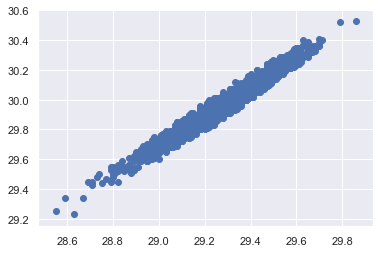

In [186]:
plt.scatter(df_weather['StnPressure'],df_weather['SeaLevel'])

#### 'StnPressure' (x axis) and 'SeaLevel' (y axis) pressures are closely linearly correlated.
SeaLevel pressure is approximately 0.6 to 0.8 more than StnPressure, since the stations are elevated above sea-level (thus experiencing lower atmospheric pressure). Accordingly, we can estimate that SeaLevel is roughly 0.7 more than StnPressure. Conversely, we can estimate that StnPressure is roughly 0.7 less than SeaLevel.
Since both are closely linearly correlated, we really only need one of them (the other can be dropped).

In [187]:
print(df_weather[df_weather['StnPressure'].isna()]['Station'].count())
print(df_weather[df_weather['SeaLevel'].isna()]['Station'].count())
df_weather[(df_weather['StnPressure'].isna()) | (df_weather['SeaLevel'].isna())]

3
6


Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
832         1 2009-06-18    80    61   71      1        63      67    0    6   
848         1 2009-06-26    86    69   78      7        60       M    0   13   
994         1 2009-09-07    77    59   68      1        59      62    0    3   
1732        1 2011-09-08    75    57   66      0        53      59    0    1   
1756        1 2011-09-20    74    49   62      0        54      58    3    0   
2090        1 2012-09-03    88    71   80     12        70      73    0   15   
2410        1 2013-08-10    81    64   73      0        57       M    0    8   
2411        2 2013-08-10    81    68   75      M        55      63    0   10   
2743        2 2014-07-23    76    64   70      M        56      61    0    5   

     Sunrise Sunset       CodeSum  PrecipTotal  StnPressure  SeaLevel  \
832     0416   1929         RA BR        0.120        29.08       NaN   
848     0418   1931                      0.000          NaN     29.85   
994     0523   1817            BR        0.000        29.39       NaN   
1732    0524   1815            RA        0.005        29.34       NaN   
1756    0537   1753  MIFG BCFG BR        0.000        29.26       NaN   
2090    0519   1824            BR        0.000        29.17       NaN   
2410    0454   1900                      0.000          NaN     30.08   
2411       -      -                      0.000          NaN     30.07   
2743       -      -                      0.000        29.47       NaN   

      ResultSpeed  ResultDir  AvgSpeed  
832           6.7         16       7.9  
848           6.4          4       8.2  
994           5.8          3       4.0  
1732         13.0          2      13.4  
1756          7.3         18       7.3  
2090          4.6          6       4.4  
2410          5.3          5       6.5  
2411          6.0          6       7.4  
2743         16.4          2      16.7

In [188]:
# df_weather.dtypes

In [189]:
# Since SeaLevel has more NaN cases, so it makes sense to drop SeaLevel.
# However, we will first impute missing values into StnPressure, whereby StnPressure = Sealevel - 0.7
df_weather.loc[848,'StnPressure'] = df_weather.loc[848,'SeaLevel'] - 0.7
df_weather.loc[2410,'StnPressure'] = df_weather.loc[2410,'SeaLevel'] - 0.7
df_weather.loc[2411,'StnPressure'] = df_weather.loc[2411,'SeaLevel'] - 0.7
# drop columns 'SeaLevel'
df_weather.drop(labels=['SeaLevel'],axis=1,inplace=True)

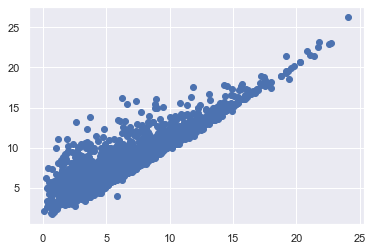

In [190]:
plt.scatter(df_weather['ResultSpeed'],df_weather['AvgSpeed'])

#### 'ResultSpeed' (x axis) and 'AvgSpeed' (y axis) are closely linearly correlated.
Since both are closely linearly correlated, we really only need one of them (the other can be dropped).
Will drop 'AvgSpeed'

In [191]:
df_weather.drop(labels=['AvgSpeed'],axis=1,inplace=True)

In [192]:
# replace symbols, 'M' with NaN
df_weather=df_weather.replace('M',np.nan)
df_weather=df_weather.replace('*',np.nan)
df_weather=df_weather.replace('-',np.nan)
#convert 60 min into 1 hour 
df_weather=df_weather.replace('1660','1700')
df_weather=df_weather.replace('1760','1800')
df_weather=df_weather.replace('1860','1900')
df_weather=df_weather.replace('1960','2000')

In [193]:
df_weather.head(1)

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50   67     14        51      56    0    2   

  Sunrise Sunset CodeSum  PrecipTotal  StnPressure  ResultSpeed  ResultDir  
0    0448   1849                  0.0         29.1          1.7         27

In [194]:
# convert 'object' type columns to numeric
df_weather['Tavg'] = pd.to_numeric(df_weather['Tavg'])
df_weather['Depart'] = pd.to_numeric(df_weather['Depart'])
df_weather['WetBulb'] = pd.to_numeric(df_weather['WetBulb'])
df_weather['Heat'] = pd.to_numeric(df_weather['Heat'])
df_weather['Cool'] = pd.to_numeric(df_weather['Cool'])

In [195]:
df_weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                  float64
Depart                float64
DewPoint                int64
WetBulb               float64
Heat                  float64
Cool                  float64
Sunrise                object
Sunset                 object
CodeSum                object
PrecipTotal           float64
StnPressure           float64
ResultSpeed           float64
ResultDir               int64
dtype: object

In [196]:
# check for NaN
df_weather.isna().sum().sort_values(ascending = False).head(8)

Depart     1467
Sunset     1467
Sunrise    1467
Heat         10
Cool         10
Tavg         10
WetBulb       4
Date          0
dtype: int64

In [197]:
display(df_weather[df_weather['Heat'].isna()].tail(1))
display(df_weather[df_weather['Cool'].isna()].tail(1))
display(df_weather[df_weather['WetBulb'].isna()].tail(1))

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
2811        2 2014-08-26    86    49   NaN     NaN        68     71.0   NaN   

      Cool Sunrise Sunset CodeSum  PrecipTotal  StnPressure  ResultSpeed  \
2811   NaN     NaN    NaN                0.005        29.41          1.3   

      ResultDir  
2811         15

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
2811        2 2014-08-26    86    49   NaN     NaN        68     71.0   NaN   

      Cool Sunrise Sunset CodeSum  PrecipTotal  StnPressure  ResultSpeed  \
2811   NaN     NaN    NaN                0.005        29.41          1.3   

      ResultDir  
2811         15

Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  \
2415        2 2013-08-12    85    69  77.0     NaN        63      NaN   0.0   

      Cool Sunrise Sunset CodeSum  PrecipTotal  StnPressure  ResultSpeed  \
2415  12.0     NaN    NaN      RA         0.66        29.27          4.5   

      ResultDir  
2415         26

In [198]:
# reset index, since a few rows were dropped previously
df_weather=df_weather.reset_index(drop=True)

# imputing with median for the null values in the 3 columns.
for col in ['Heat','Cool','WetBulb']:
    for i in range(2807):
        if np.isnan(df_weather[col][i]):
            df_weather[col][i] = df_weather[col].median()

C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [199]:
# impute 'Tavg'
for index, row in df_weather.iterrows():
    if np.isnan(row['Tavg']):
        df_weather.loc[index,'Tavg'] = (row['Tmax']+row['Tmin'])/2

In [200]:
# impute 'Depart'
# from observing the data, this value is calculated by subtracting a reference temp of 53degF / 54degF from Tavg
# we shall use the mid-point i.e. 53.5degF
for index, row in df_weather.iterrows():
    if np.isnan(row['Depart']):
        df_weather.loc[index,'Depart'] = row['Tavg'] - 53.5

In [201]:
# impute 'Sunrise' and 'Sunset'
# the missing values are only in the weather records for Station 2.
# where 'Sunrise' is missing, 'Sunset' is also missing
# we impute these using the same values from Station 1 for the same day
for index, row in df_weather.iterrows():
    if not type(row['Sunrise'])==float: # values not missing - 'nan' is type float; otherwise it would be type str
        previous_sunrise = row['Sunrise'] # store for the next record
        previous_sunset = row['Sunset'] # store for the next record
    else:
        df_weather.loc[index,'Sunrise'] = previous_sunrise
        df_weather.loc[index,'Sunset'] = previous_sunset

In [202]:
# check for NaN
df_weather.isna().sum().any()

False

In [203]:
df_weather.shape

(2939, 17)

### Process Sunrise / Sunset and then get daylight hours

In [204]:
# convert sunrise and sunset into date time format after inserting ':' in between hour and minute
df_weather['Sunrise'] = df_weather['Sunrise'].map(lambda x: x[0:2]+':'+x[2:4])
df_weather['Sunset'] = df_weather['Sunset'].map(lambda x: x[0:2]+':'+x[2:4])

df_weather['Sunrise']=pd.to_datetime(df_weather['Sunrise'],format='%H:%M') 
df_weather['Sunset']=pd.to_datetime(df_weather['Sunset'],format='%H:%M') 
# To get the time information subtracted the date
df_weather['temp'] = pd.to_datetime('1900-01-01 00:00:00')
df_weather['Sunrise']=df_weather['Sunrise']-df_weather['temp']
df_weather['Sunset']=df_weather['Sunset']-df_weather['temp']

In [205]:
# calculated day time as sunset - sunrise
df_weather['daytime']=(df_weather['Sunset']-df_weather['Sunrise']).astype(str)

In [206]:
# Dewpoint depression = dry bulb temperature(Average Temperature)-dewpoint temperature 
df_weather['dew_point_depression']=df_weather['Tavg']-df_weather['DewPoint']

In [207]:
# wet bulb depression = dry bulb temperature(Average Temperature)-wetbulb temperature 
df_weather['wet_bulb_depression']=df_weather['Tavg']-df_weather['WetBulb']

In [208]:
# Extracted month from date and converted to integer
df_weather['month']=pd.DatetimeIndex(df_weather['Date']).month.astype(int)

In [209]:
# Extracted year from date and converted to integer
df_weather['year']=pd.DatetimeIndex(df_weather['Date']).year.astype(int)

In [210]:
# Function to calculate relative humidity
def relative_humidity(tavg,dewpoint):
    #converted temperature to celcius
    tavg_celcius = (5.0/9.0)*(tavg-32.0)
    dewpoint_celcius = (5.0/9.0)*(dewpoint-32.0)
    # Calculated vapour pressure and actual pressure
    saturation_vapour_pressure = 6.11*10.0**(7.5*tavg_celcius/(237.7+tavg_celcius))
    actual_pressure = 6.11*10.0**(7.5*dewpoint_celcius/(237.7+dewpoint_celcius))
    #return relative humidity
    return round(((actual_pressure/saturation_vapour_pressure)*100))

In [211]:
# New column with Relative humidity values are created from the function
df_weather['relative_humidity']=relative_humidity(df_weather['Tavg'],df_weather['DewPoint']).astype(int)

In [212]:
df_weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum',
       'PrecipTotal', 'StnPressure', 'ResultSpeed', 'ResultDir', 'temp',
       'daytime', 'dew_point_depression', 'wet_bulb_depression', 'month',
       'year', 'relative_humidity'],
      dtype='object')

In [213]:
# Reindexed the columns
df_weather = df_weather.reindex(columns = ['Date','Station','month', 'year','Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
                                           'dew_point_depression','WetBulb','wet_bulb_depression','relative_humidity',
                                           'Heat', 'Cool', 'Sunrise', 'Sunset','daytime', 'CodeSum', 'PrecipTotal',
                                           'StnPressure', 'ResultSpeed', 'ResultDir'])
df_weather.head()

Date  Station  month  year  Tmax  Tmin  Tavg  Depart  DewPoint  \
0 2007-05-01        1      5  2007    83    50  67.0    14.0        51   
1 2007-05-01        2      5  2007    84    52  68.0    14.5        51   
2 2007-05-02        1      5  2007    59    42  51.0    -3.0        42   
3 2007-05-02        2      5  2007    60    43  52.0    -1.5        42   
4 2007-05-03        1      5  2007    66    46  56.0     2.0        40   

   dew_point_depression  WetBulb  wet_bulb_depression  relative_humidity  \
0                  16.0     56.0                 11.0                 56   
1                  17.0     57.0                 11.0                 55   
2                   9.0     47.0                  4.0                 71   
3                  10.0     47.0                  5.0                 69   
4                  16.0     48.0                  8.0                 55   

   Heat  Cool  Sunrise   Sunset                    daytime CodeSum  \
0   0.0   2.0 04:48:00 18:49:00  0 days 14:01:00.000000000           
1   0.0   3.0 04:48:00 18:49:00  0 days 14:01:00.000000000           
2  14.0   0.0 04:47:00 18:50:00  0 days 14:03:00.000000000      BR   
3  13.0   0.0 04:47:00 18:50:00  0 days 14:03:00.000000000   BR HZ   
4   9.0   0.0 04:46:00 18:51:00  0 days 14:05:00.000000000           

   PrecipTotal  StnPressure  ResultSpeed  ResultDir  
0          0.0        29.10          1.7         27  
1          0.0        29.18          2.7         25  
2          0.0        29.38         13.0          4  
3          0.0        29.44         13.3          2  
4          0.0        29.39         11.7          7

### Deal with 'CodeSum'

In [214]:
# Extract all the 'CodeSum' component values (e.g. RA, HZ, FU, FG+ etc.)
# Note that this weather data will have to be used together with the test data
# Note that this set of weather data includes the period covered by both the Train and Test data
# So for training, we will use the subset of weather data for the period in the Train data (2007-05-29 to 2013-09-26)
# For testing, we will use the subset of weather data for the period of the Test data (2008-06-11 to 2014-10-02)

# global variable
code_sum_list = []

def get_code_sum_elems(code_sum_string):
    global code_sum_list # use the global variable
    # extend the global variable with this_list
    code_sum_list.extend(code_sum_string.split())
    return True

for i in df_weather['CodeSum']:
    get_code_sum_elems(i.strip())

code_sum_set = set(code_sum_list)
print(code_sum_set)

{'MIFG', 'VCFG', 'BCFG', 'RA', 'FG+', 'GR', 'VCTS', 'BR', 'FG', 'TS', 'FU', 'TSRA', 'SQ', 'DZ', 'HZ', 'SN'}


In [215]:
# For each CodeSum element, create a column (total of 16 columns)
for i in code_sum_set:
    df_weather[i] = 0

In [216]:
for index, row in df_weather.iterrows():
    cs_list = row['CodeSum'].split() # split the CodeSum string
    for j in cs_list:
        #set corresponding column to 1
        if j in code_sum_set:
            df_weather.loc[index,j]=1

In [217]:
# now we can drop the 'CodeSum' column
df_weather.drop(labels='CodeSum',axis=1,inplace=True)

In [218]:
df_weather.shape

(2939, 38)

In [219]:
df_weather.head(5)

Date  Station  month  year  Tmax  Tmin  Tavg  Depart  DewPoint  \
0 2007-05-01        1      5  2007    83    50  67.0    14.0        51   
1 2007-05-01        2      5  2007    84    52  68.0    14.5        51   
2 2007-05-02        1      5  2007    59    42  51.0    -3.0        42   
3 2007-05-02        2      5  2007    60    43  52.0    -1.5        42   
4 2007-05-03        1      5  2007    66    46  56.0     2.0        40   

   dew_point_depression  WetBulb  wet_bulb_depression  relative_humidity  \
0                  16.0     56.0                 11.0                 56   
1                  17.0     57.0                 11.0                 55   
2                   9.0     47.0                  4.0                 71   
3                  10.0     47.0                  5.0                 69   
4                  16.0     48.0                  8.0                 55   

   Heat  Cool  Sunrise   Sunset                    daytime  PrecipTotal  \
0   0.0   2.0 04:48:00 18:49:00  0 days 14:01:00.000000000          0.0   
1   0.0   3.0 04:48:00 18:49:00  0 days 14:01:00.000000000          0.0   
2  14.0   0.0 04:47:00 18:50:00  0 days 14:03:00.000000000          0.0   
3  13.0   0.0 04:47:00 18:50:00  0 days 14:03:00.000000000          0.0   
4   9.0   0.0 04:46:00 18:51:00  0 days 14:05:00.000000000          0.0   

   StnPressure  ResultSpeed  ResultDir  MIFG  VCFG  BCFG  RA  FG+  GR  VCTS  \
0        29.10          1.7         27     0     0     0   0    0   0     0   
1        29.18          2.7         25     0     0     0   0    0   0     0   
2        29.38         13.0          4     0     0     0   0    0   0     0   
3        29.44         13.3          2     0     0     0   0    0   0     0   
4        29.39         11.7          7     0     0     0   0    0   0     0   

   BR  FG  TS  FU  TSRA  SQ  DZ  HZ  SN  
0   0   0   0   0     0   0   0   0   0  
1   0   0   0   0     0   0   0   0   0  
2   1   0   0   0     0   0   0   0   0  
3   1   0   0   0     0   0   0   1   0  
4   0   0   0   0     0   0   0   0   0

### Split weather data into Station 1 and Station 2 sets

In [220]:
df_weather_station1 = df_weather[df_weather['Station']==1]
df_weather_station2 = df_weather[df_weather['Station']==2]
print(df_weather_station1.shape)
print(df_weather_station2.shape)

(1472, 38)
(1467, 38)


# Pre-Process Train and Test data

### Concatenate Train & Test data to avoid duplication of pre-processing / cleaning

In [221]:
# Creating a temporary column to identify test data from train data
df_train['train']=1
df_test['train']=0
# Concatinating the test and train data together
df=pd.concat([df_train, df_test], ignore_index=True,axis=0,sort=True)
df.tail(2)

Address  AddressAccuracy  \
126797  2100 North Cannon Drive, Chicago, IL 60614, USA                8   
126798  2100 North Cannon Drive, Chicago, IL 60614, USA                8   

                AddressNumberAndStreet  Block        Date        Id  \
126797  2100  N CANNON DR, Chicago, IL     21  2014-10-02  116292.0   
126798  2100  N CANNON DR, Chicago, IL     21  2014-10-02  116293.0   

         Latitude  Longitude  NumMosquitos            Species        Street  \
126797  41.925652  -87.63359           NaN  UNSPECIFIED CULEX   N CANNON DR   
126798  41.925652  -87.63359           NaN    CULEX ERRATICUS   N CANNON DR   

         Trap  WnvPresent  train  
126797  T054C         NaN      0  
126798  T054C         NaN      0

In [222]:
df.isna().sum().sort_values(ascending = False).head(5)

WnvPresent      116293
NumMosquitos    116293
Id               10506
train                0
Trap                 0
dtype: int64

In [223]:
# Null 'WnvPresent' and 'NumMosquitos' are from the Test data - this is OK. Will leave them for now.

# can drop 'Id' - will not be used
df.drop(['Id'],axis=1,inplace=True)

In [224]:
df['Date']=pd.to_datetime(df['Date'])

In [225]:
df['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS', 'UNSPECIFIED CULEX'], dtype=object)

### Determine which train/test rows are nearest to Station 1 / Station 2
Observations that took place nearer to Station 1 will be associated with Station 1's weather data.<br>
Observations that took place nearer to Station 2 will be associated with Station 2's weather data.

In [226]:
# Set variables for Latitude, Longitude of weather stations 1 & 2
# This will be used to calculate the distance (as the crow flies) between stations and observation points
stn1_location = (41.995,-87.933)
stn2_location = (41.786,-87.752)

def calc_dist_chk(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    #formula calc distance between two points 
    #haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    #distance in km
    distance = R * c
    return round(distance, 4)

def find_nearest_stn(latitude, longitude):
    dist_from_stn1 = calc_dist_chk(latitude, longitude, stn1_location[0], stn1_location[1])
    dist_from_stn2 = calc_dist_chk(latitude, longitude, stn2_location[0], stn2_location[1])
    if dist_from_stn1 <= dist_from_stn2:
        return 1
    else:
        return 2

In [227]:
# THIS TAKES ABOUT 10-15 MINUTES TO EXECUTE
# For each observation (row), check distance to nearest weather station
# Assign 'stn_ref' to the nearest weather station (either 1 or 2)
for index, row in df.iterrows():
    nearest_station = find_nearest_stn(row['Latitude'],row['Longitude'])
    df.loc[index,'stn_ref'] = nearest_station

print('Number on train/test rows nearest Station 1:',df[df['stn_ref']==1]['stn_ref'].count())
print('Number on train/test rows nearest Station 2:',df[df['stn_ref']==2]['stn_ref'].count())

Number on train/test rows nearest Station 1: 38699
Number on train/test rows nearest Station 2: 88100


In [228]:
df.head(1)

Address  AddressAccuracy  \
0  4100 North Oak Park Avenue, Chicago, IL 60634,...                9   

              AddressNumberAndStreet  Block       Date  Latitude  Longitude  \
0  4100  N OAK PARK AVE, Chicago, IL     41 2007-05-29  41.95469 -87.800991   

   NumMosquitos                 Species           Street  Trap  WnvPresent  \
0           1.0  CULEX PIPIENS/RESTUANS   N OAK PARK AVE  T002         0.0   

   train  stn_ref  
0      1      1.0

### Split the data into 'Station 1' and 'Station 2' sets

In [229]:
df_station1 = df[df['stn_ref']==1.0]
df_station2 = df[df['stn_ref']==2.0]
print(df_station1.shape)
print(df_station2.shape)

(38699, 14)
(88100, 14)


### Merge 'Station 1' set with weather data from Station 1
Then split this into Train data, Test data

In [230]:
df_station1_merged = pd.merge(df_station1, df_weather_station1, on='Date', how='left')
print(df_station1_merged.shape)
df_station1_merged.head(1)

(38699, 51)


Address  AddressAccuracy  \
0  4100 North Oak Park Avenue, Chicago, IL 60634,...                9   

              AddressNumberAndStreet  Block       Date  Latitude  Longitude  \
0  4100  N OAK PARK AVE, Chicago, IL     41 2007-05-29  41.95469 -87.800991   

   NumMosquitos                 Species           Street  Trap  WnvPresent  \
0           1.0  CULEX PIPIENS/RESTUANS   N OAK PARK AVE  T002         0.0   

   train  stn_ref  Station  month  year  Tmax  Tmin  Tavg  Depart  DewPoint  \
0      1      1.0        1      5  2007    88    60  74.0    10.0        58   

   dew_point_depression  WetBulb  wet_bulb_depression  relative_humidity  \
0                  16.0     65.0                  9.0                 57   

   Heat  Cool  Sunrise   Sunset                    daytime  PrecipTotal  \
0   0.0   9.0 04:21:00 19:17:00  0 days 14:56:00.000000000          0.0   

   StnPressure  ResultSpeed  ResultDir  MIFG  VCFG  BCFG  RA  FG+  GR  VCTS  \
0        29.39          5.8         18     0     0     0   0    0   0     0   

   BR  FG  TS  FU  TSRA  SQ  DZ  HZ  SN  
0   1   0   0   0     0   0   0   1   0

In [231]:
df_station1_merged_train = df_station1_merged[df_station1_merged['train']==1] # train data
df_station1_merged_test = df_station1_merged[df_station1_merged['train']==0] # test data
print(df_station1_merged_train.shape)
print(df_station1_merged_test.shape)

(3298, 51)
(35401, 51)


In [232]:
df_station2_merged = pd.merge(df_station2, df_weather_station2, on='Date', how='left')
print(df_station2_merged.shape)
df_station2_merged.head(1)

(88100, 51)


Address  AddressAccuracy  \
0  1500 West Webster Avenue, Chicago, IL 60614, USA                8   

             AddressNumberAndStreet  Block       Date  Latitude  Longitude  \
0  1500  W WEBSTER AVE, Chicago, IL     15 2007-05-29   41.9216 -87.666455   

   NumMosquitos         Species          Street  Trap  WnvPresent  train  \
0           2.0  CULEX RESTUANS   W WEBSTER AVE  T045         0.0      1   

   stn_ref  Station  month    year  Tmax  Tmin  Tavg  Depart  DewPoint  \
0      2.0      2.0    5.0  2007.0  88.0  65.0  77.0    23.5      59.0   

   dew_point_depression  WetBulb  wet_bulb_depression  relative_humidity  \
0                  18.0     66.0                 11.0               54.0   

   Heat  Cool  Sunrise   Sunset                    daytime  PrecipTotal  \
0   0.0  12.0 04:21:00 19:17:00  0 days 14:56:00.000000000          0.0   

   StnPressure  ResultSpeed  ResultDir  MIFG  VCFG  BCFG   RA  FG+   GR  VCTS  \
0        29.44          5.8       16.0   0.0   0.0   0.0  0.0  0.0  0.0   0.0   

    BR   FG   TS   FU  TSRA   SQ   DZ   HZ   SN  
0  1.0  0.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0

In [233]:
df_station2_merged.isna().sum().sort_values(ascending=False).head(5)

NumMosquitos    80892
WnvPresent      80892
SN                 24
DewPoint           24
Sunrise            24
dtype: int64

In [234]:
index_drop=df_station2_merged[df_station2_merged['Sunrise'].isna()].index.values

In [235]:
df_station2_merged.drop(labels=index_drop,inplace=True)

In [236]:
df_station2_merged.isna().sum().sort_values(ascending=False).head(5)

WnvPresent              80892
NumMosquitos            80892
train                       0
dew_point_depression        0
DewPoint                    0
dtype: int64

In [237]:
df_station2_merged_train = df_station2_merged[df_station2_merged['train']==1] # train data
df_station2_merged_test = df_station2_merged[df_station2_merged['train']==0] # test data
print(df_station2_merged_train.shape)
print(df_station2_merged_test.shape)

(7184, 51)
(80892, 51)


### Concatenate back TRAIN data and reindex

In [238]:
df_tr_full = pd.concat([df_station1_merged_train, df_station2_merged_train], ignore_index=True,axis=0,sort=True)

In [239]:
# drop 'train', 'Station'
# reindex
df_tr_full=df_tr_full.reindex(columns = ['Date','month', 'year', 'Block','Latitude','Longitude', 'Street',
                                         'Trap','Species','NumMosquitos','WnvPresent',
                                         'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint','dew_point_depression',
                                         'WetBulb','wet_bulb_depression','relative_humidity', 'Heat', 'Cool',
                                         'Sunrise', 'Sunset','daytime', 'PrecipTotal','StnPressure',
                                         'ResultSpeed', 'ResultDir', 'DZ', 'BCFG', 'BR', 'FG', 'FG+', 'FU', 'GR',
                                         'HZ', 'MIFG', 'RA', 'SN', 'SQ', 'TS', 'TSRA', 'VCFG', 'VCTS'])
df_tr_full.head(1)

Date  month    year  Block  Latitude  Longitude           Street  \
0 2007-05-29    5.0  2007.0     41  41.95469 -87.800991   N OAK PARK AVE   

   Trap                 Species  NumMosquitos  WnvPresent  Tmax  Tmin  Tavg  \
0  T002  CULEX PIPIENS/RESTUANS           1.0         0.0  88.0  60.0  74.0   

   Depart  DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
0    10.0      58.0                  16.0     65.0                  9.0   

   relative_humidity  Heat  Cool  Sunrise   Sunset                    daytime  \
0               57.0   0.0   9.0 04:21:00 19:17:00  0 days 14:56:00.000000000   

   PrecipTotal  StnPressure  ResultSpeed  ResultDir   DZ  BCFG   BR   FG  FG+  \
0          0.0        29.39          5.8       18.0  0.0   0.0  1.0  0.0  0.0   

    FU   GR   HZ  MIFG   RA   SN   SQ   TS  TSRA  VCFG  VCTS  
0  0.0  0.0  1.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0

In [240]:
df_tr_full.shape

(10482, 45)

In [241]:
df_tr_full.isna().sum().any()

False

### Concatenate back TEST data and reset index

In [242]:
df_tst_full = pd.concat([df_station1_merged_test, df_station2_merged_test], ignore_index=True,axis=0,sort=True)

In [243]:
# drop 'train', 'Station', 'NumMosquitos', 'WnvPresent'
# reindex
df_tst_full=df_tst_full.reindex(columns = ['Date','month', 'year', 'Block','Latitude','Longitude', 'Street',
                                           'Trap','Species',
                                           'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint','dew_point_depression',
                                           'WetBulb','wet_bulb_depression','relative_humidity', 'Heat', 'Cool',
                                           'Sunrise', 'Sunset','daytime', 'PrecipTotal','StnPressure',
                                           'ResultSpeed', 'ResultDir', 'DZ', 'BCFG', 'BR', 'FG', 'FG+', 'FU', 'GR',
                                           'HZ', 'MIFG', 'RA', 'SN', 'SQ', 'TS', 'TSRA', 'VCFG', 'VCTS'])
df_tst_full.head(1)

Date  month    year  Block  Latitude  Longitude           Street  \
0 2008-06-11    6.0  2008.0     41  41.95469 -87.800991   N OAK PARK AVE   

   Trap                 Species  Tmax  Tmin  Tavg  Depart  DewPoint  \
0  T002  CULEX PIPIENS/RESTUANS  86.0  61.0  74.0     7.0      56.0   

   dew_point_depression  WetBulb  wet_bulb_depression  relative_humidity  \
0                  18.0     64.0                 10.0               53.0   

   Heat  Cool  Sunrise   Sunset                    daytime  PrecipTotal  \
0   0.0   9.0 04:16:00 19:26:00  0 days 15:10:00.000000000          0.0   

   StnPressure  ResultSpeed  ResultDir   DZ  BCFG   BR   FG  FG+   FU   GR  \
0        29.28          8.9       18.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   

    HZ  MIFG   RA   SN   SQ   TS  TSRA  VCFG  VCTS  
0  0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0

In [244]:
df_tst_full.shape

(116293, 43)

#  
# EXPLORATORY DATA ANALYSIS

In [245]:
# Checking the correlation of all independent variables with WnvPresent
df_tr_full.corr()['WnvPresent'].sort_values()

Longitude              -0.060230
Heat                   -0.053474
dew_point_depression   -0.052775
ResultSpeed            -0.044270
VCTS                   -0.035337
wet_bulb_depression    -0.035152
DZ                     -0.010631
Depart                 -0.004154
StnPressure            -0.002877
ResultDir              -0.002161
Block                   0.004555
TS                      0.017159
PrecipTotal             0.021072
RA                      0.022012
HZ                      0.023589
Latitude                0.028544
TSRA                    0.033583
Tmax                    0.046966
year                    0.050348
Cool                    0.052227
relative_humidity       0.057729
Tavg                    0.059328
BR                      0.060211
FG                      0.061373
Tmin                    0.064701
WetBulb                 0.079257
DewPoint                0.084680
month                   0.099583
NumMosquitos            0.196572
WnvPresent              1.000000
BCFG      

In [246]:
# drop BCFG FG+ FU GR MIFG SN SQ VCFG since they do not appear correlated at all to WnvPresent
df_tr_full.drop(['BCFG','FG+','FU','GR','MIFG','SN','SQ','VCFG'],axis=1,inplace=True)
df_tst_full.drop(['BCFG','FG+','FU','GR','MIFG','SN','SQ','VCFG'],axis=1,inplace=True)

In [247]:
df_tr_full.head(1)

Date  month    year  Block  Latitude  Longitude           Street  \
0 2007-05-29    5.0  2007.0     41  41.95469 -87.800991   N OAK PARK AVE   

   Trap                 Species  NumMosquitos  WnvPresent  Tmax  Tmin  Tavg  \
0  T002  CULEX PIPIENS/RESTUANS           1.0         0.0  88.0  60.0  74.0   

   Depart  DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
0    10.0      58.0                  16.0     65.0                  9.0   

   relative_humidity  Heat  Cool  Sunrise   Sunset                    daytime  \
0               57.0   0.0   9.0 04:21:00 19:17:00  0 days 14:56:00.000000000   

   PrecipTotal  StnPressure  ResultSpeed  ResultDir   DZ   BR   FG   HZ   RA  \
0          0.0        29.39          5.8       18.0  0.0  1.0  0.0  1.0  0.0   

    TS  TSRA  VCTS  
0  0.0   0.0   0.0

Text(0.5, 1, 'Correlations between selected features')

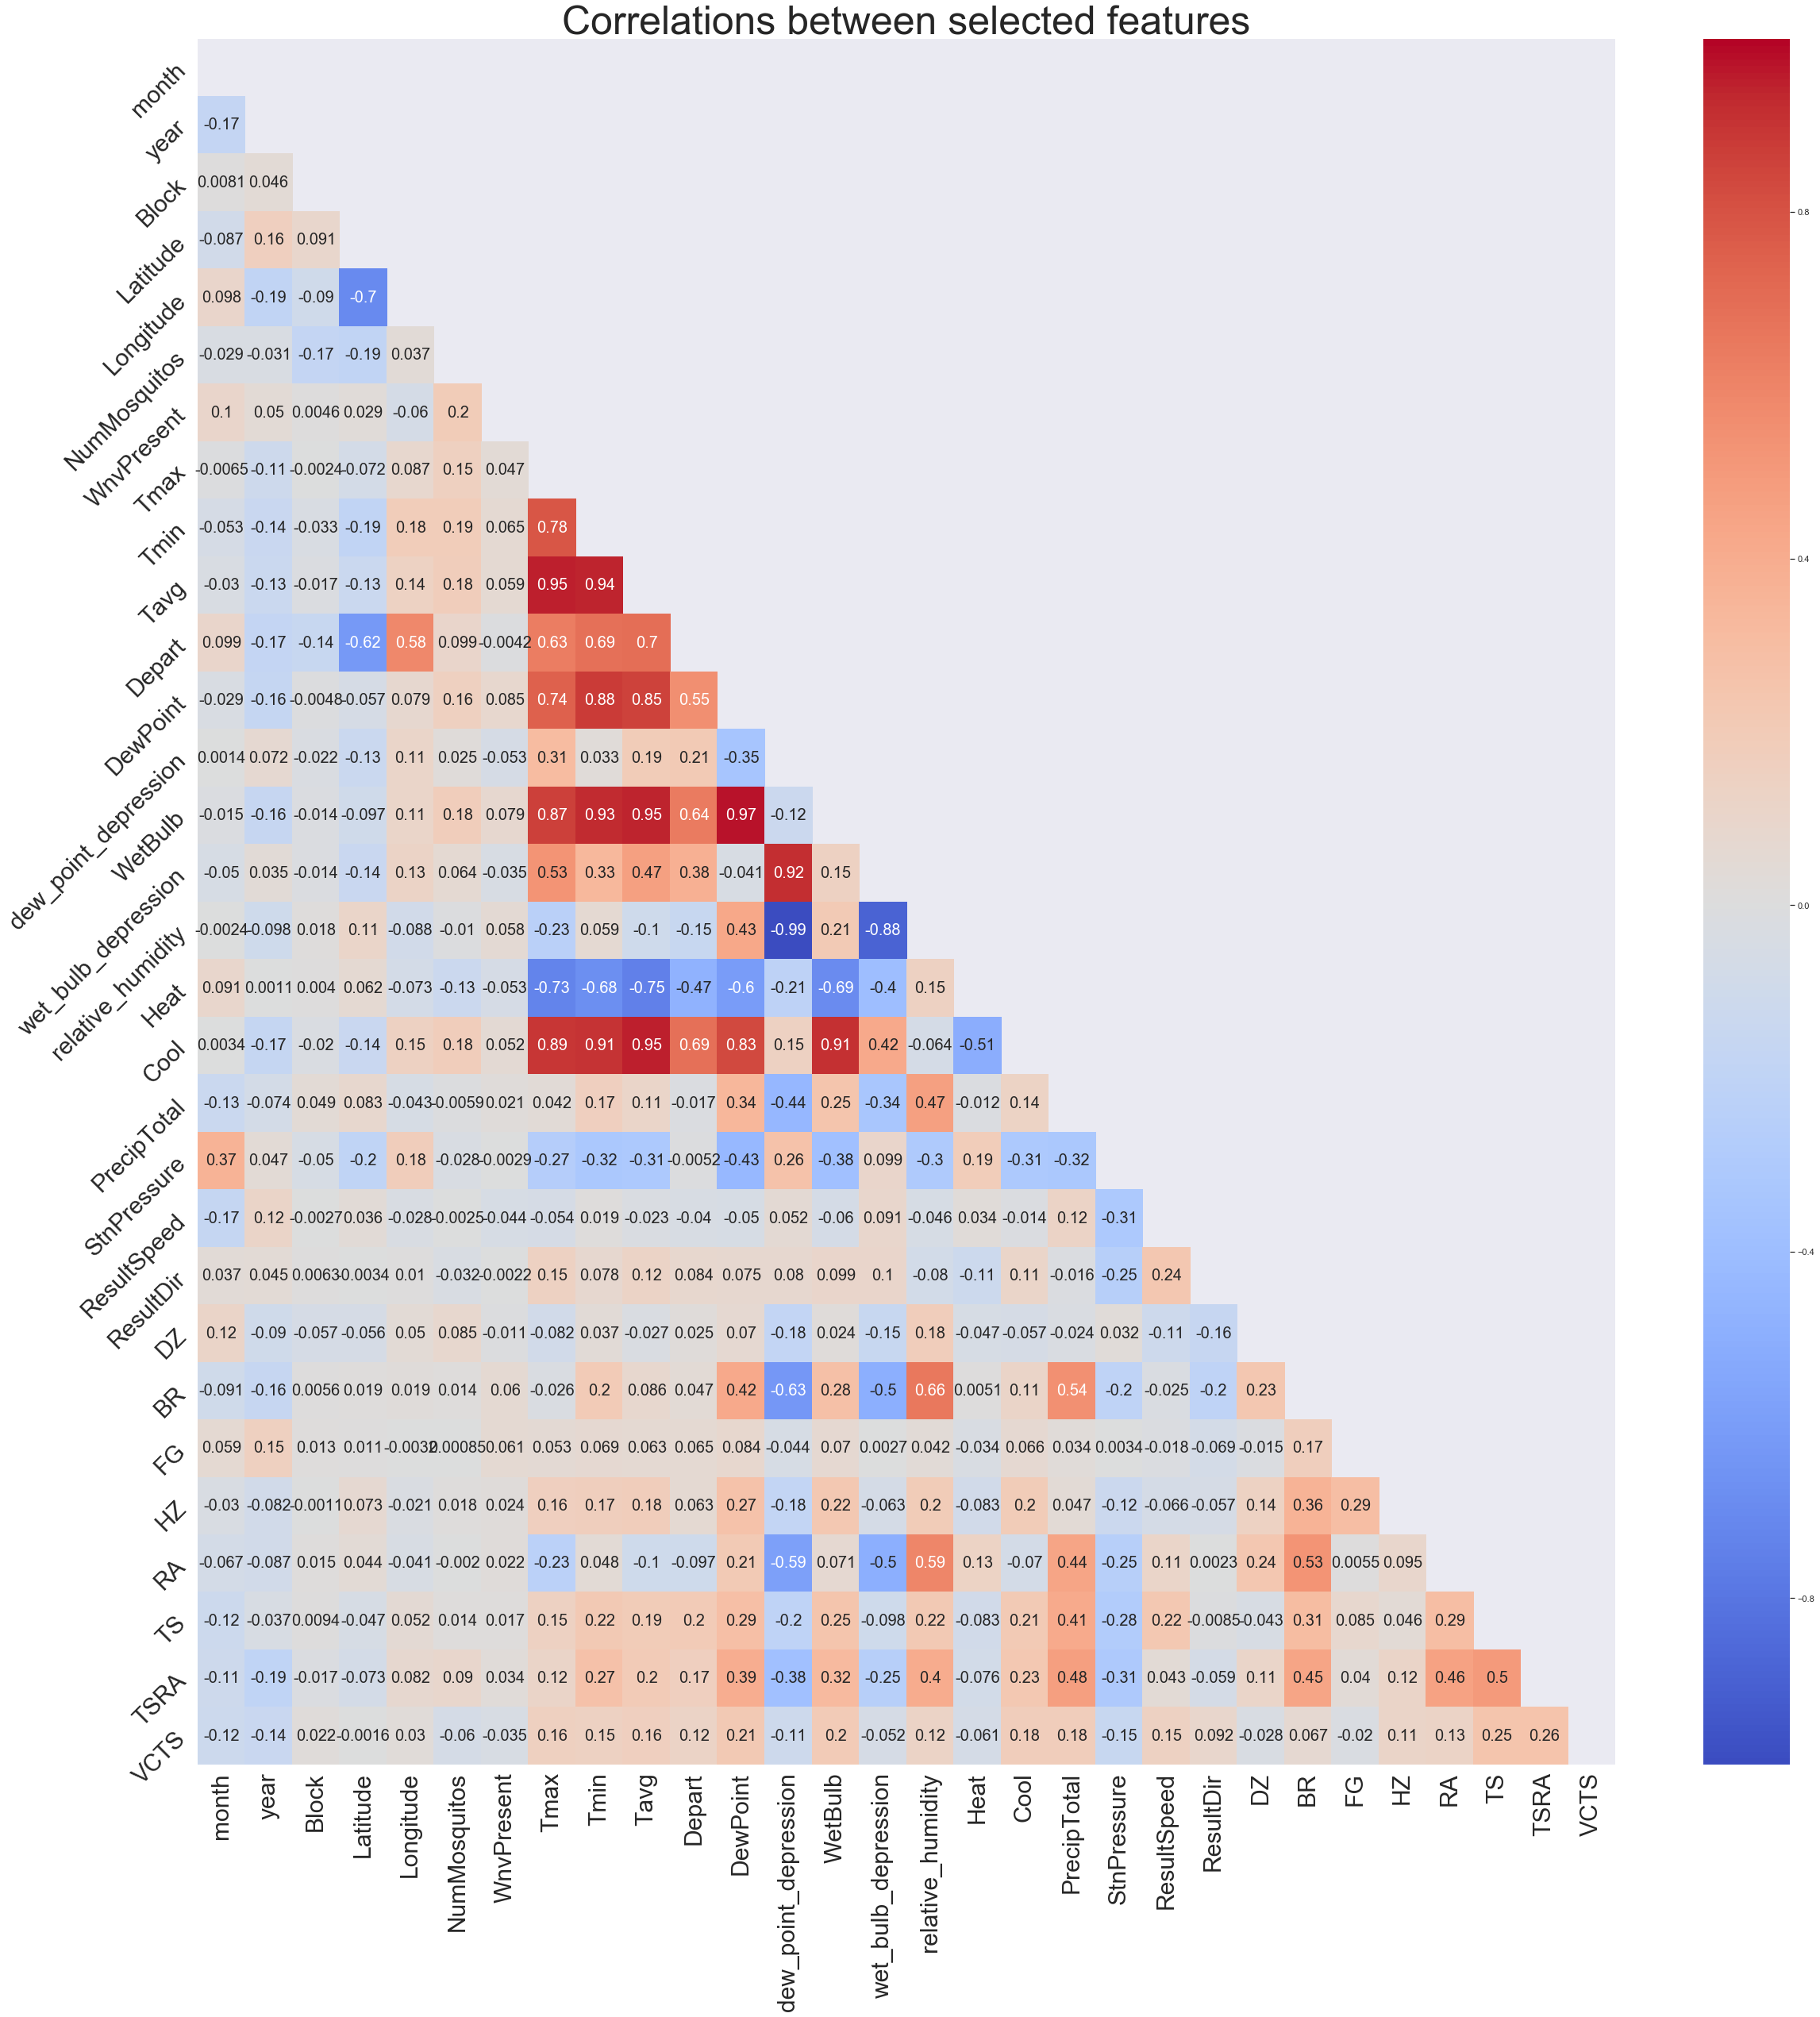

In [248]:
# Heatmap to look into the correlation between selected features(especially continuous)
corr = df_tr_full.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

labels=['month', 'year', 'Block','Latitude','Longitude', 'NumMosquitos', 'WnvPresent','Tmax', 'Tmin', 'Tavg', 
        'Depart', 'DewPoint', 'dew_point_depression', 'WetBulb', 'wet_bulb_depression', 'relative_humidity',
        'Heat', 'Cool', 'PrecipTotal','StnPressure', 'ResultSpeed', 'ResultDir', 'DZ', 'BR', 'FG','HZ', 'RA',
        'TS', 'TSRA', 'VCTS']

plt.subplots(figsize=(40,40))
ax = plt.axes()
sns.heatmap(corr,mask=mask,annot = True,annot_kws={'size':20},cmap="coolwarm",ax=ax)
ax.set_xticklabels(labels,size = 30,rotation=90)
ax.set_yticklabels(labels,size = 30,rotation=45)
ax.set_title('Correlations between selected features', size = 50)

***Correlated variables***
1. Tavg, Tmax(To be removed) and Tmin(To be removed)
2. Cool and Wetbulb(To be removed)
3. Wetbulb Depression and Dewpoint Depression(To be Removed)

In [249]:
# Function for constructing the scatter plot
def scatter(predictor_list,target,dataframe,list_of_xaxis,title):
    n = int(np.ceil(len(predictor_list)))

    fig, ax = plt.subplots(nrows=n,ncols=1,figsize=(50,600))

    ax = ax.ravel()
    for i,item in enumerate (predictor_list):
        ax[i].scatter(dataframe[item], dataframe[target],s=100)
        ax[i].set_xlabel(list_of_xaxis[i],fontsize = 50)
        ax[i].tick_params(axis='x', labelsize=30, rotation=90)
        ax[i].tick_params(axis='y', labelsize=30)
        ax[0].set_title(title, size = 50)

In [250]:
initial_variable=['month','year','Block','Latitude','Longitude', 'Street','Trap','Tavg','DewPoint',
                  'wet_bulb_depression','Heat' ,'Cool','relative_humidity','daytime','PrecipTotal', 'StnPressure',
                  'ResultSpeed','ResultDir','Species','NumMosquitos']

In [251]:
scatter(initial_variable,'WnvPresent',df_tr_full,initial_variable,'Features Vs Target' )

In [252]:
# Function to construct histogram for the independat variables
def hist(predictor_list_target,dataframe,list_of_xaxis,title):
    n = int(np.ceil(len(predictor_list_target)))

    fig, ax = plt.subplots(nrows=n,ncols=1,figsize=(50,100))
    ax = ax.ravel()
    
    for i,item in enumerate (predictor_list_target):
        ax[i].hist(dataframe[item])
        ax[i].set_xlabel(list_of_xaxis[i],fontsize = 50)
        ax[i].tick_params(axis='x', labelsize=30)
        ax[i].tick_params(axis='y', labelsize=30)
        ax[0].set_title(title, size = 50)  

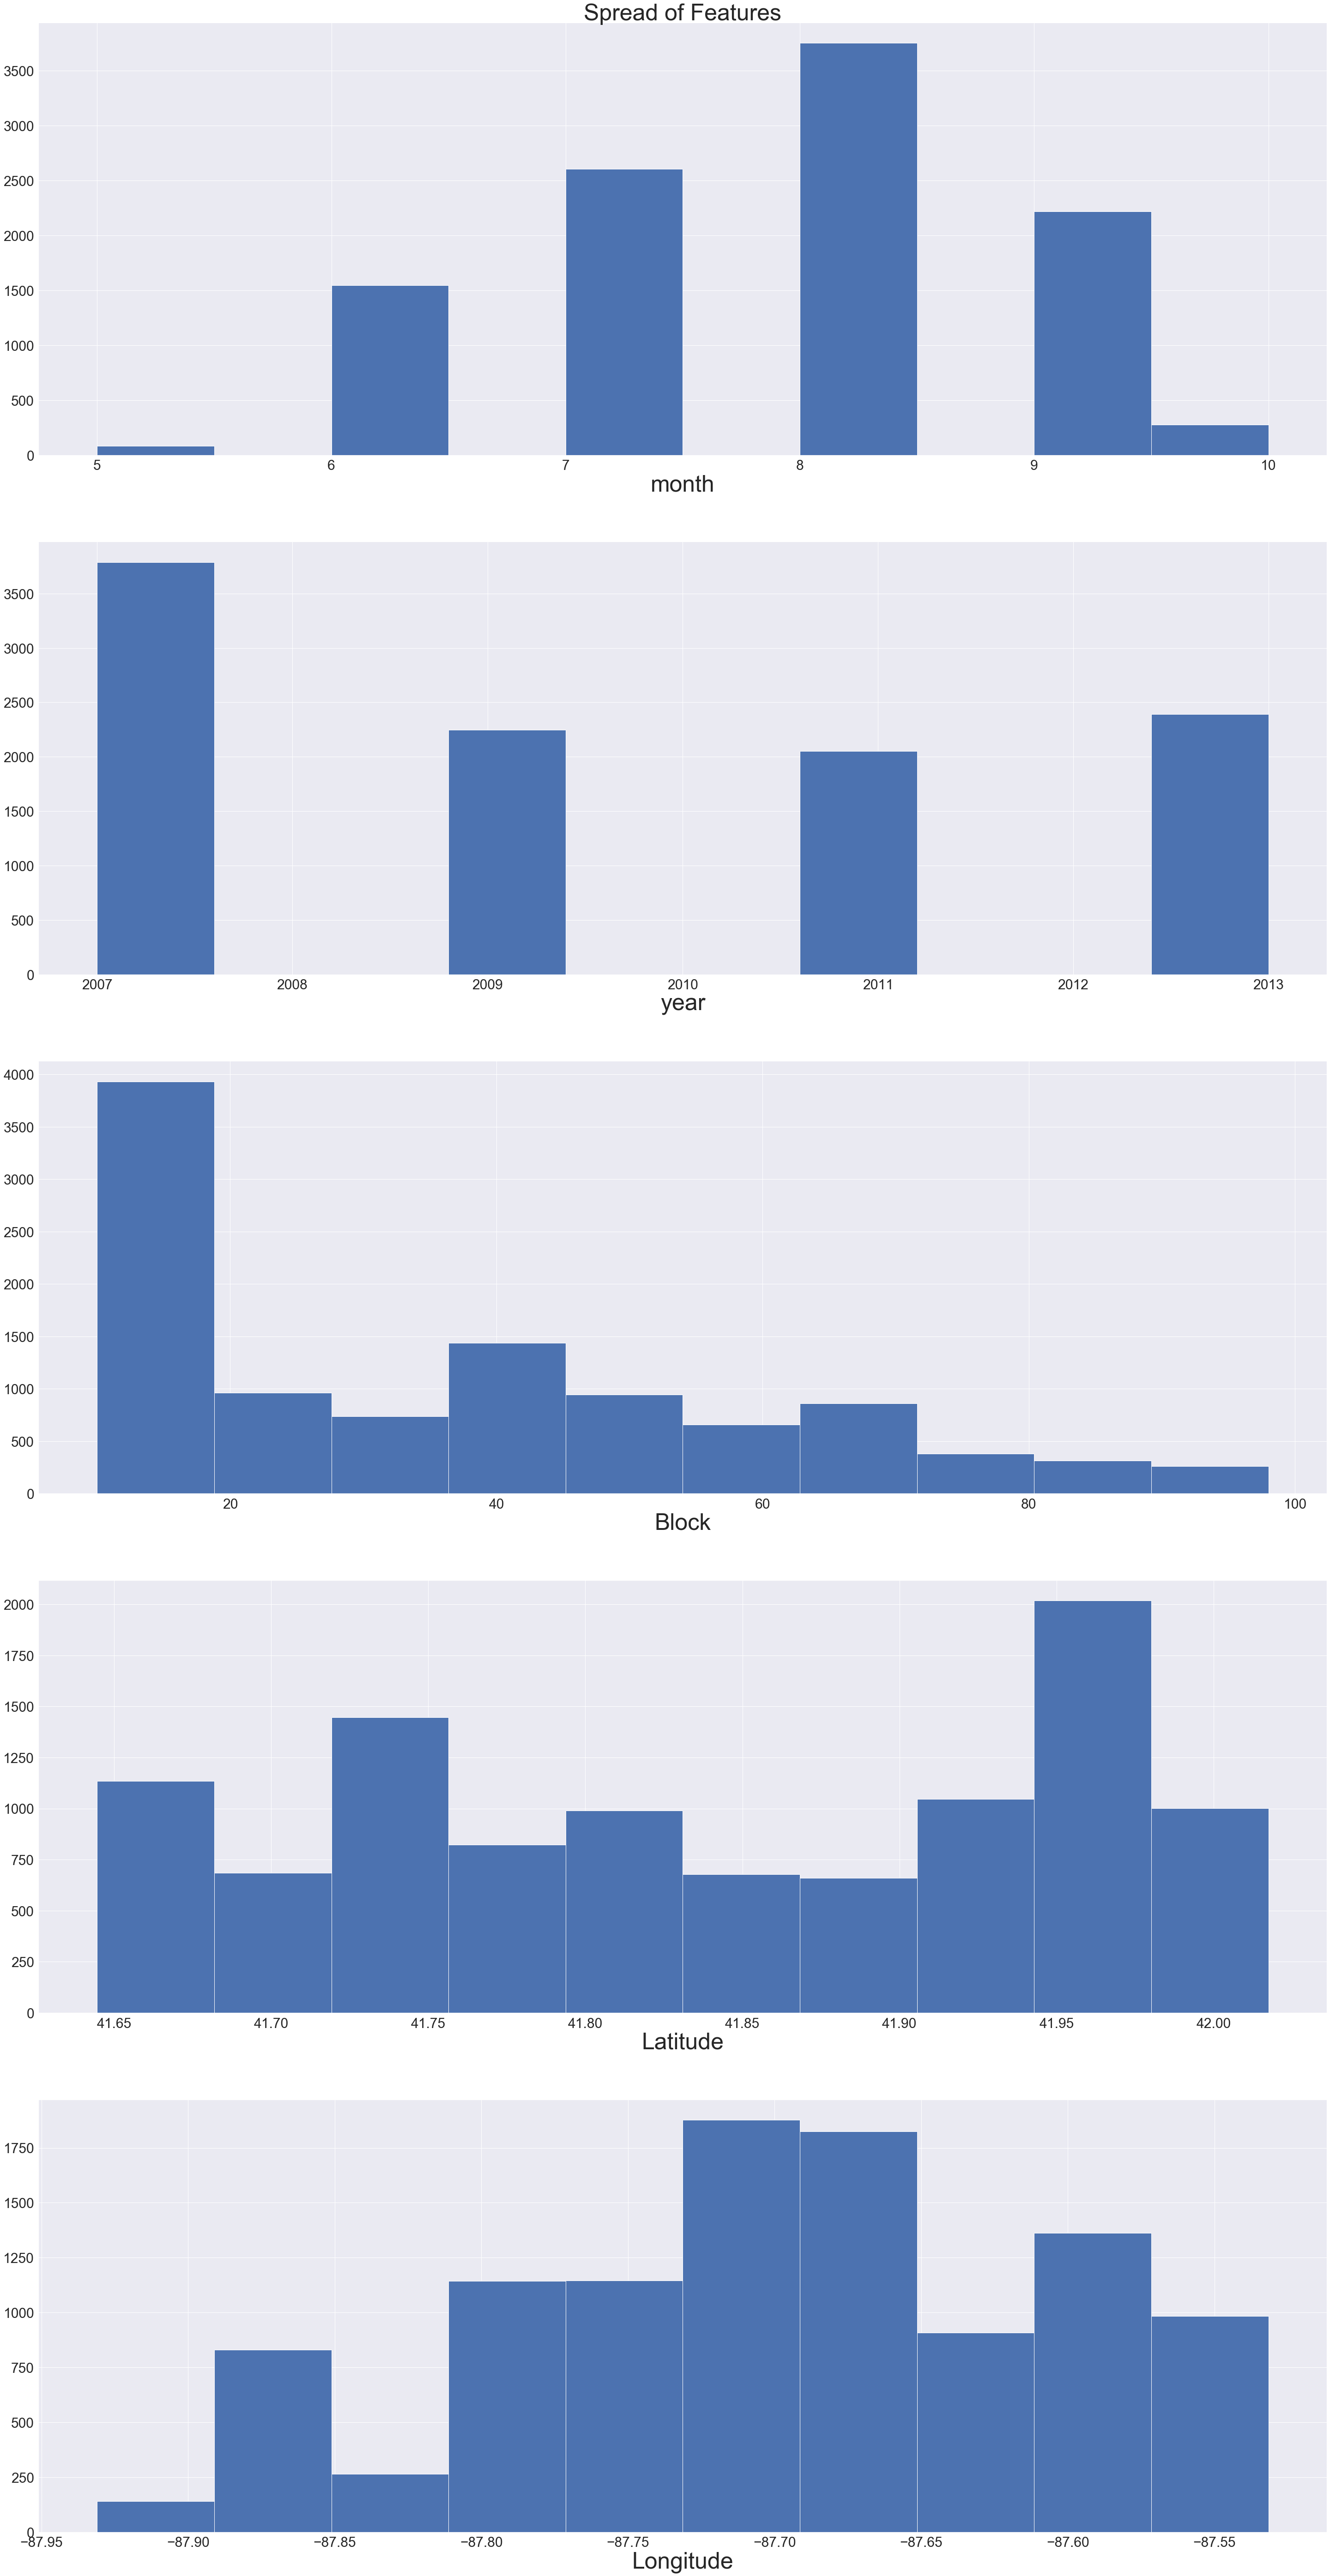

In [253]:
hist_variable=['month','year','Block','Latitude','Longitude']
hist(hist_variable,df_tr_full,hist_variable,'Spread of Features')

(array([9931.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         551.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

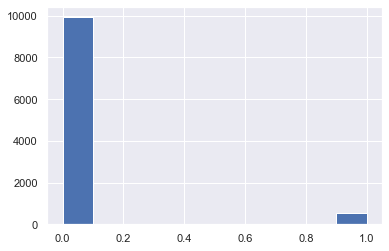

In [254]:
plt.hist(df_tr_full['WnvPresent'])

In [255]:
name=['052007','062007','072007','082007','092007','102007',
                           '052009','062009','072009','082009','092009','102009',
                           '062011','072011','082011','092011',
                           '062011','072013','082013','092013']
temporary = df_tr_full.groupby(['year','month'])['WnvPresent'].count()
temporary

year    month
2007.0  5.0        25
        6.0       152
        7.0       575
        8.0      2050
        9.0       774
        10.0      211
2009.0  5.0        59
        6.0       578
        7.0       755
        8.0       374
        9.0       418
        10.0       65
2011.0  6.0       381
        7.0       640
        8.0       493
        9.0       540
2013.0  6.0       436
        7.0       636
        8.0       834
        9.0       486
Name: WnvPresent, dtype: int64

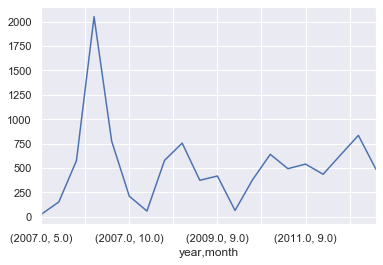

In [256]:
df_tr_full.groupby(['year','month'])['WnvPresent'].count().plot()

This plot shows there is a decrease in WNV virus after August 2007. This might be due to the awareness in the public and measures taken by government to reduce the virus.

In [257]:
df_tr_full.head(1)

Date  month    year  Block  Latitude  Longitude           Street  \
0 2007-05-29    5.0  2007.0     41  41.95469 -87.800991   N OAK PARK AVE   

   Trap                 Species  NumMosquitos  WnvPresent  Tmax  Tmin  Tavg  \
0  T002  CULEX PIPIENS/RESTUANS           1.0         0.0  88.0  60.0  74.0   

   Depart  DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
0    10.0      58.0                  16.0     65.0                  9.0   

   relative_humidity  Heat  Cool  Sunrise   Sunset                    daytime  \
0               57.0   0.0   9.0 04:21:00 19:17:00  0 days 14:56:00.000000000   

   PrecipTotal  StnPressure  ResultSpeed  ResultDir   DZ   BR   FG   HZ   RA  \
0          0.0        29.39          5.8       18.0  0.0  1.0  0.0  1.0  0.0   

    TS  TSRA  VCTS  
0  0.0   0.0   0.0

### drop 'Depart' column

In [258]:
df_tr_full.drop(['Depart'],axis=1,inplace=True)
df_tst_full.drop(['Depart'],axis=1,inplace=True)

In [259]:
df_tr_full.head(1)

Date  month    year  Block  Latitude  Longitude           Street  \
0 2007-05-29    5.0  2007.0     41  41.95469 -87.800991   N OAK PARK AVE   

   Trap                 Species  NumMosquitos  WnvPresent  Tmax  Tmin  Tavg  \
0  T002  CULEX PIPIENS/RESTUANS           1.0         0.0  88.0  60.0  74.0   

   DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
0      58.0                  16.0     65.0                  9.0   

   relative_humidity  Heat  Cool  Sunrise   Sunset                    daytime  \
0               57.0   0.0   9.0 04:21:00 19:17:00  0 days 14:56:00.000000000   

   PrecipTotal  StnPressure  ResultSpeed  ResultDir   DZ   BR   FG   HZ   RA  \
0          0.0        29.39          5.8       18.0  0.0  1.0  0.0  1.0  0.0   

    TS  TSRA  VCTS  
0  0.0   0.0   0.0

In [260]:
df_tst_full.head(1)

Date  month    year  Block  Latitude  Longitude           Street  \
0 2008-06-11    6.0  2008.0     41  41.95469 -87.800991   N OAK PARK AVE   

   Trap                 Species  Tmax  Tmin  Tavg  DewPoint  \
0  T002  CULEX PIPIENS/RESTUANS  86.0  61.0  74.0      56.0   

   dew_point_depression  WetBulb  wet_bulb_depression  relative_humidity  \
0                  18.0     64.0                 10.0               53.0   

   Heat  Cool  Sunrise   Sunset                    daytime  PrecipTotal  \
0   0.0   9.0 04:16:00 19:26:00  0 days 15:10:00.000000000          0.0   

   StnPressure  ResultSpeed  ResultDir   DZ   BR   FG   HZ   RA   TS  TSRA  \
0        29.28          8.9       18.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

   VCTS  
0   0.0

# Export Train/Test data (merged with Weather data) to csv files

In [261]:
df_tr_full.to_csv('../assets/df_tr_full_updated_v2.csv',index=False)
df_tst_full.to_csv('../assets/df_tst_full_updated_v2.csv',index=False)

# Further Exploration of Data

### Count of mosquitos and WnvPresent by Species

In [262]:
df_tr_species =  df_tr_full.groupby('Species')['NumMosquitos', 'WnvPresent'].sum()

In [263]:
df_tr_species.sort_values('NumMosquitos', inplace=True)

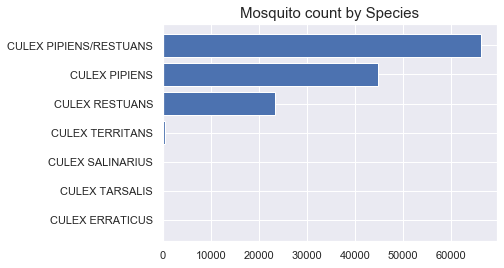

In [264]:
plt.barh(df_tr_species.index, df_tr_species['NumMosquitos'], label='NumMosquitos')
plt.title("Mosquito count by Species", fontdict={'size': 15});

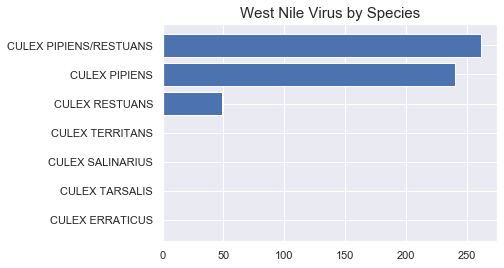

In [265]:
plt.barh(df_tr_species.index, df_tr_species['WnvPresent'], label='WnvPresent');
plt.title("West Nile Virus by Species", fontdict={'size': 15});

### Count of mosquitos and WnvPresent by Trap

In [266]:
df_tr_trap  = df_tr_full.groupby('Trap')['NumMosquitos', 'WnvPresent'].sum()

In [267]:
df_tr_trap_top10 = df_tr_trap.sort_values('NumMosquitos', ascending=True).tail(10)

In [268]:
df_tr_trap_top10

NumMosquitos  WnvPresent
Trap                          
T158        2569.0         6.0
T212        2595.0         3.0
T008        2668.0        10.0
T103        2988.0         6.0
T135        3119.0         8.0
T128        3315.0        11.0
T002        3710.0        18.0
T138        9936.0        16.0
T900       15386.0        66.0
T115       21668.0        41.0

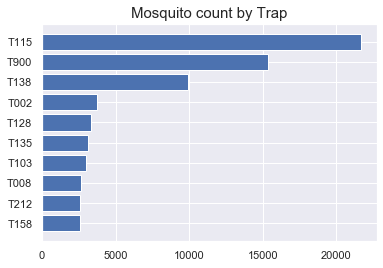

In [269]:
plt.barh(df_tr_trap_top10.index, df_tr_trap_top10['NumMosquitos'], label='NumMosquitos')
plt.title("Mosquito count by Trap", fontdict={'size': 15});

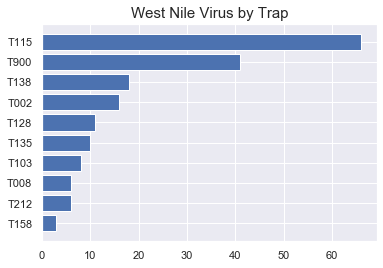

In [270]:
plt.barh(df_tr_trap_top10.index, df_tr_trap_top10.sort_values('WnvPresent')['WnvPresent'], label='WnvPresent')
plt.title("West Nile Virus by Trap", fontdict={'size': 15});

### Weather Patterns

In [271]:
df_weather_new = df_weather[~(df_weather['Tavg']=='M')]

C:\Users\XXX\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [272]:
df_weather_new['Tavg'] = df_weather_new['Tavg'].astype('float')

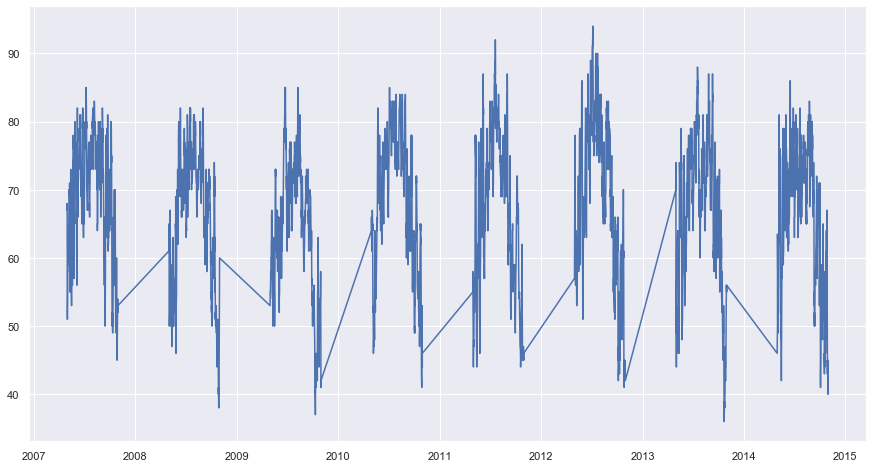

In [273]:
plt.figure(figsize=(15,8))
plt.plot(df_weather_new['Date'], df_weather_new['Tavg'])

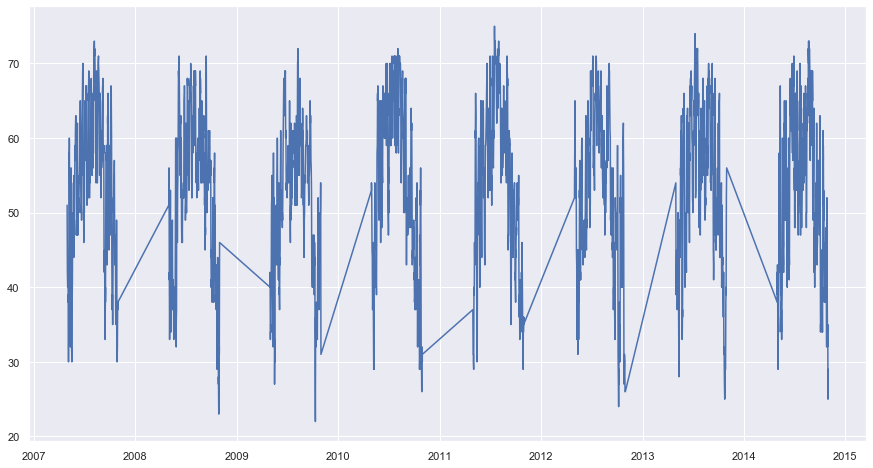

In [274]:
plt.figure(figsize=(15,8))
plt.plot(df_weather_new['Date'], df_weather_new['DewPoint'])

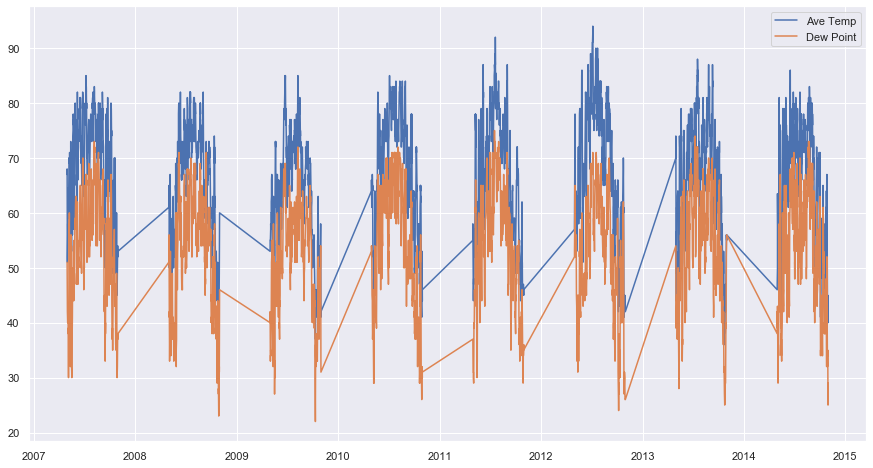

In [275]:
plt.figure(figsize=(15,8))
plt.plot(df_weather_new['Date'], df_weather_new['Tavg'], label='Ave Temp')
plt.plot(df_weather_new['Date'], df_weather_new['DewPoint'], label='Dew Point')
plt.legend()

### Check correlation between spray and WNV
The correlation between the spray data and the existence of the West Nile virus is a worthwhile topic to delve into.<br>
This is going by the assumption that the insectivide spray lasts for at most 2 days in the best weather conditions.

In [276]:
#TO FIND POINTS THAT ARE WNVPRESENT AND COINCIDES WITH SPRAY DATES AT MOST 2 DAYS BEFORE
def find_spray_points(df, df_spray, WnvPresent=1):
    suspect_dates = {}
    val_dict = {}
    wnv_df = df[df['WnvPresent'] == WnvPresent].reset_index()

    for i  in range(wnv_df.shape[0]): #loop thru train data having WnvPresent
        wnv_date = wnv_df.loc[i, :]['Date'] 
        #get date two days vefore 
        twod_before = wnv_date - timedelta(days=2)
        wnv_lat = wnv_df.loc[i, 'Latitude']
        wnv_lon = wnv_df.loc[i, 'Longitude']

        #spray dates coincide with 1-2 days before wnv spotted
        spray_coincide = df_spray[(df_spray['Date'] >= twod_before) & (df_spray['Date'] < wnv_date)].reset_index()
        if spray_coincide.shape[0] > 0:
            for j in range(spray_coincide.shape[0]):
                spray_lat = spray_coincide.loc[j, 'Latitude']
                spray_lon = spray_coincide.loc[j, 'Longitude']
                #find spray points within 0.2km
                if calc_dist_chk(wnv_lat, wnv_lon, spray_lat, spray_lon) < 0.2:
                    suspect_dates[wnv_df.loc[i,'index']] = (wnv_df.loc[i,'Date'],\
                        calc_dist_chk(wnv_lat, wnv_lon, spray_lat, spray_lon), round(wnv_lat,4), round(wnv_lon, 4))
    
    #to get unique values
    for k, val in suspect_dates.items():
        if val not in val_dict.values():
            val_dict[k] = val
        
    return val_dict

In [277]:
#to find spray points that coincide with WnvPresent=1
df_spray['Date'] = pd.to_datetime(df_spray['Date'])
find_spray_points(df_tr_full, df_spray, 1)

{2733: (Timestamp('2013-07-19 00:00:00'), 0.1736, 42.0083, -87.7779),
 3188: (Timestamp('2013-09-06 00:00:00'), 0.1984, 42.0099, -87.8073)}

As we can see that even though the insecticide was sprayed at most 2 days before, it did not stop the occurence of the West Nile Virus. 

In [278]:
# df_tr_full[df_tr_full['index'] == 8894]
df_tr_full[df_tr_full.index == 8894]

Date  month    year  Block   Latitude  Longitude      Street  Trap  \
8894 2011-09-23    9.0  2011.0     65  41.728495 -87.600963   E 91ST PL  T227   

                     Species  NumMosquitos  WnvPresent  Tmax  Tmin  Tavg  \
8894  CULEX PIPIENS/RESTUANS           3.0         0.0  62.0  48.0  55.0   

      DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
8894      46.0                   9.0     51.0                  4.0   

      relative_humidity  Heat  Cool  Sunrise   Sunset  \
8894               72.0  10.0   0.0 05:40:00 17:48:00   

                        daytime  PrecipTotal  StnPressure  ResultSpeed  \
8894  0 days 12:08:00.000000000         0.02        29.38          4.1   

      ResultDir   DZ   BR   FG   HZ   RA   TS  TSRA  VCTS  
8894       36.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0

![wnv_spray1.png](../img/wnv_spray1.png)

In the first occurence, the insecticide was sprayed on July 17 2013 and 2 days after the mosquitos in that trap were tested positive for West Nile Virus. 

In [279]:
# df_tr_full[df_tr_full['index'] == 10158]
df_tr_full[df_tr_full.index == 10158]

Date  month    year  Block   Latitude  Longitude      Street  \
10158 2013-09-06    9.0  2013.0     11  41.896282 -87.655232   W CHICAGO   

       Trap        Species  NumMosquitos  WnvPresent  Tmax  Tmin  Tavg  \
10158  T049  CULEX PIPIENS           5.0         0.0  85.0  62.0  74.0   

       DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
10158      55.0                  19.0     63.0                 11.0   

       relative_humidity  Heat  Cool  Sunrise   Sunset  \
10158               52.0   0.0   9.0 05:22:00 18:19:00   

                         daytime  PrecipTotal  StnPressure  ResultSpeed  \
10158  0 days 12:57:00.000000000          0.0        29.44          4.3   

       ResultDir   DZ   BR   FG   HZ   RA   TS  TSRA  VCTS  
10158       17.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0

![wnv_spray2.png](../img/wnv_spray2.png)

In [280]:
#to find spray points that coincide with WnvPresent=0
find_spray_points(df_tr_full, df_spray, 0)

{2732: (Timestamp('2013-07-19 00:00:00'), 0.1736, 42.0083, -87.7779),
 9414: (Timestamp('2013-07-19 00:00:00'), 0.1502, 41.733, -87.6496),
 9421: (Timestamp('2013-07-19 00:00:00'), 0.1135, 41.7232, -87.65)}

#### Conversely, when we check if there is an occurence for spraying of insecticide two days or one day before, there exists those observation points where there are no West Nile Virus present. 

In [281]:
#df_tr_full[df_tr_full['index'] == 8862]
df_tr_full[df_tr_full.index == 8862]

Date  month    year  Block   Latitude  Longitude         Street  \
8862 2011-09-23    9.0  2011.0     17  41.911824 -87.726737   N PULASKI RD   

      Trap                 Species  NumMosquitos  WnvPresent  Tmax  Tmin  \
8862  T039  CULEX PIPIENS/RESTUANS           1.0         0.0  62.0  48.0   

      Tavg  DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
8862  55.0      46.0                   9.0     51.0                  4.0   

      relative_humidity  Heat  Cool  Sunrise   Sunset  \
8862               72.0  10.0   0.0 05:40:00 17:48:00   

                        daytime  PrecipTotal  StnPressure  ResultSpeed  \
8862  0 days 12:08:00.000000000         0.02        29.38          4.1   

      ResultDir   DZ   BR   FG   HZ   RA   TS  TSRA  VCTS  
8862       36.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0

![wnv0_spray1.png](../img/wnv0_spray1.png)

In [282]:
#df_tr_full[df_tr_full['index'] == 8874]
df_tr_full[df_tr_full.index == 8874]

Date  month    year  Block   Latitude  Longitude           Street  \
8874 2011-09-23    9.0  2011.0     77  41.754676 -87.612922   S EBERHART AVE   

      Trap                 Species  NumMosquitos  WnvPresent  Tmax  Tmin  \
8874  T080  CULEX PIPIENS/RESTUANS           3.0         0.0  62.0  48.0   

      Tavg  DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
8874  55.0      46.0                   9.0     51.0                  4.0   

      relative_humidity  Heat  Cool  Sunrise   Sunset  \
8874               72.0  10.0   0.0 05:40:00 17:48:00   

                        daytime  PrecipTotal  StnPressure  ResultSpeed  \
8874  0 days 12:08:00.000000000         0.02        29.38          4.1   

      ResultDir   DZ   BR   FG   HZ   RA   TS  TSRA  VCTS  
8874       36.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0

![wnv0_spray2.png](../img/wnv0_spray2.png)

In [283]:
#df_tr_full[df_tr_full['index'] == 8893]
df_tr_full[df_tr_full.index == 8893]

Date  month    year  Block   Latitude  Longitude          Street  \
8893 2011-09-23    9.0  2011.0     82  41.743402 -87.731435   S KOSTNER AVE   

      Trap                 Species  NumMosquitos  WnvPresent  Tmax  Tmin  \
8893  T225  CULEX PIPIENS/RESTUANS           2.0         0.0  62.0  48.0   

      Tavg  DewPoint  dew_point_depression  WetBulb  wet_bulb_depression  \
8893  55.0      46.0                   9.0     51.0                  4.0   

      relative_humidity  Heat  Cool  Sunrise   Sunset  \
8893               72.0  10.0   0.0 05:40:00 17:48:00   

                        daytime  PrecipTotal  StnPressure  ResultSpeed  \
8893  0 days 12:08:00.000000000         0.02        29.38          4.1   

      ResultDir   DZ   BR   FG   HZ   RA   TS  TSRA  VCTS  
8893       36.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0

![wnv0_spray3.png](../img/wnv0_spray3.png)

### CONCLUSION ON SPRAY EFFECTIVENESS
Hence, there is no conclusive evidence that suggests that the spraying at most two days before actually really repels the occurence of the West Nile Virus. The reason could be because the spraying is not regular enough for it to be effective in subduing the virus. 

Also, mostly insecticide spraying is more reactive than proactive because of political and environmental concerns from the US public.

# TIME SERIES 

In [284]:
df_timeshift_tr = pd.read_csv('../assets/df_timeshift_tr.csv')
df_timeshift_tr.head()

Date  Tavg  DewPoint  TSRA  TS  relative_humidity  Cool  \
0  2007-05-29  74.0        58     0   0                 57   9.0   
1  2007-06-05  56.0        48     0   0                 74   0.0   
2  2007-06-26  81.0        69     1   0                 67  16.0   
3  2007-06-29  63.0        55     0   0                 75   0.0   
4  2007-07-02  66.0        50     0   0                 56   1.0   

   wet_bulb_depression  ResultSpeed  NumMosquitos  WnvPresent  
0                  9.0          5.8          40.0         0.0  
1                  5.0          5.2         127.0         0.0  
2                  9.0          6.1         216.0         0.0  
3                  4.0          7.6          85.0         0.0  
4                  8.0          5.9         240.0         0.0

In [285]:
df_timeshift_tr['NumMosquitos_1000']=df_timeshift_tr['NumMosquitos']/1000
df_timeshift_tr['NumMosquitos_100']=df_timeshift_tr['NumMosquitos']/100
df_timeshift_tr['NumMosquitos_10']=df_timeshift_tr['NumMosquitos']/10

In [286]:
df_timeshift_tr_b4spray = df_timeshift_tr[df_timeshift_tr['Date']<'2011-08-29']

In [287]:
df_timeshift_tr_b4spray.head(1)

Date  Tavg  DewPoint  TSRA  TS  relative_humidity  Cool  \
0  2007-05-29  74.0        58     0   0                 57   9.0   

   wet_bulb_depression  ResultSpeed  NumMosquitos  WnvPresent  \
0                  9.0          5.8          40.0         0.0   

   NumMosquitos_1000  NumMosquitos_100  NumMosquitos_10  
0               0.04               0.4              4.0

Text(0.5, 0, 'Date')

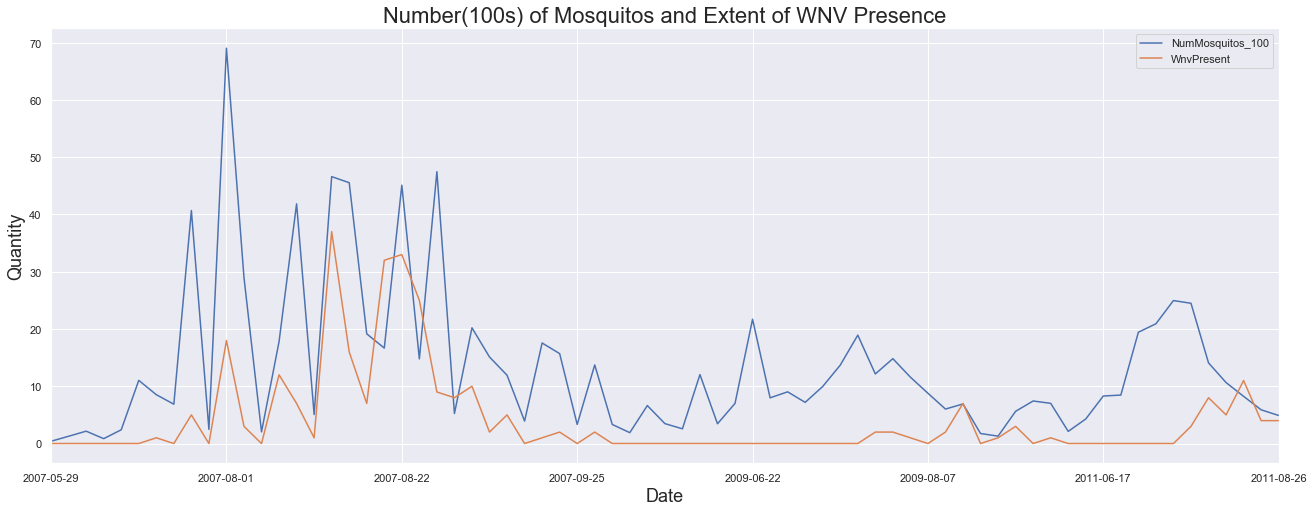

In [288]:
fig, ax = plt.subplots(figsize=(22,8))
df_timeshift_tr_b4spray.plot('Date','NumMosquitos_100',ax=ax)
df_timeshift_tr_b4spray.plot('Date','WnvPresent',ax=ax)
plt.title('Number(100s) of Mosquitos and Extent of WNV Presence', fontsize=22)
plt.ylabel('Quantity', fontsize=18)
plt.xlabel('Date', fontsize=18)

Text(0.5, 0, 'Date')

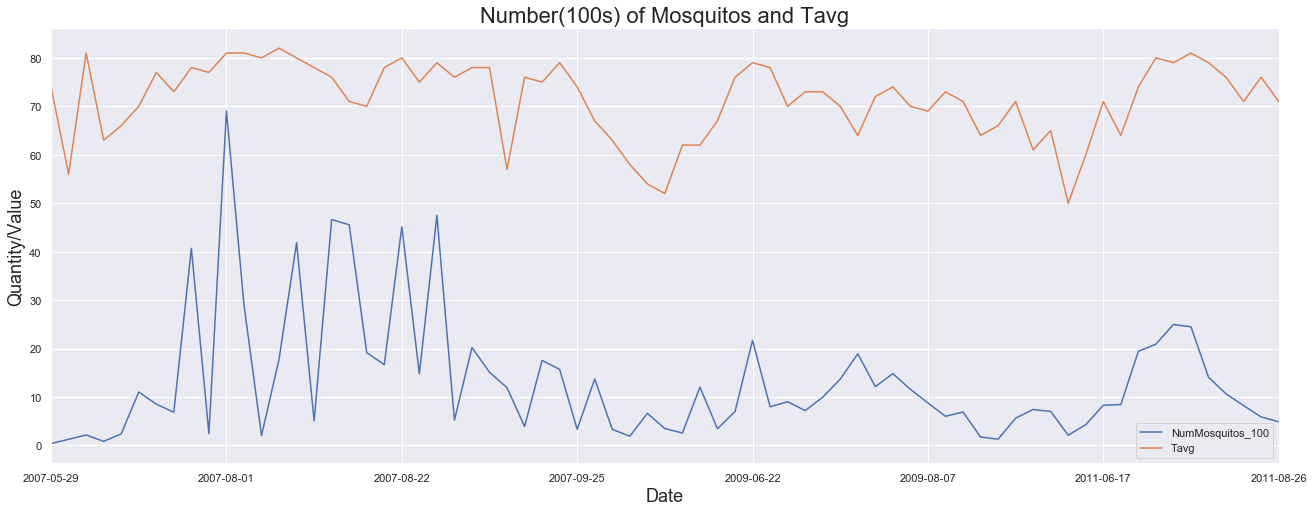

In [289]:
fig, ax = plt.subplots(figsize=(22,8))
df_timeshift_tr_b4spray.plot('Date','NumMosquitos_100',ax=ax)
df_timeshift_tr_b4spray.plot('Date','Tavg',ax=ax)
plt.title('Number(100s) of Mosquitos and Tavg', fontsize=22)
plt.ylabel('Quantity/Value', fontsize=18)
plt.xlabel('Date', fontsize=18)

Text(0.5, 0, 'Date')

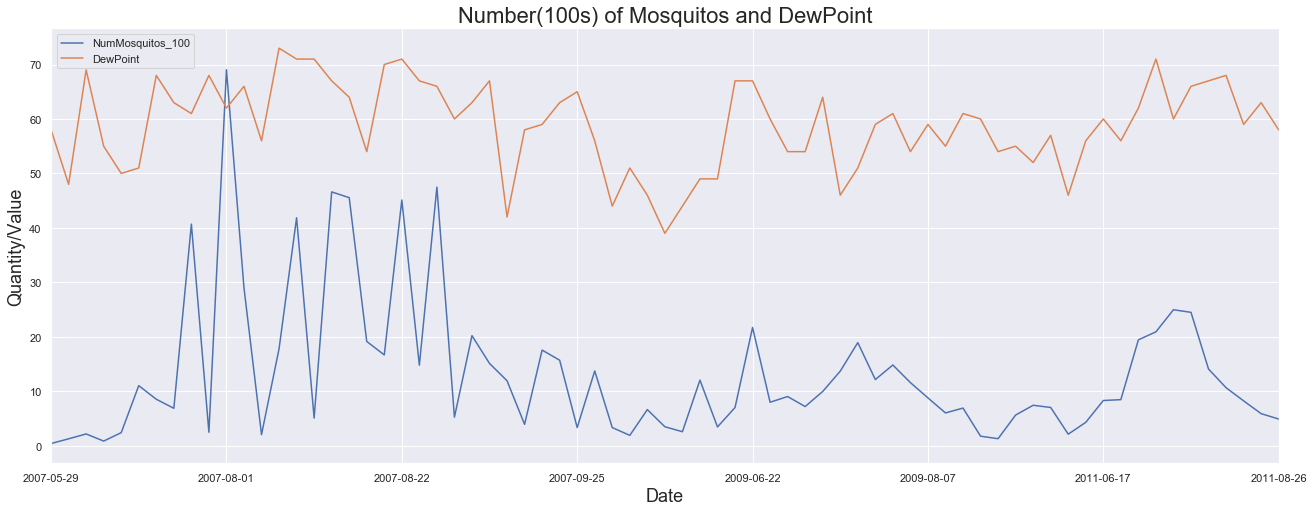

In [290]:
fig, ax = plt.subplots(figsize=(22,8))
df_timeshift_tr_b4spray.plot('Date','NumMosquitos_100',ax=ax)
df_timeshift_tr_b4spray.plot('Date','DewPoint',ax=ax)
plt.title('Number(100s) of Mosquitos and DewPoint', fontsize=22)
plt.ylabel('Quantity/Value', fontsize=18)
plt.xlabel('Date', fontsize=18)

Text(0.5, 0, 'Date')

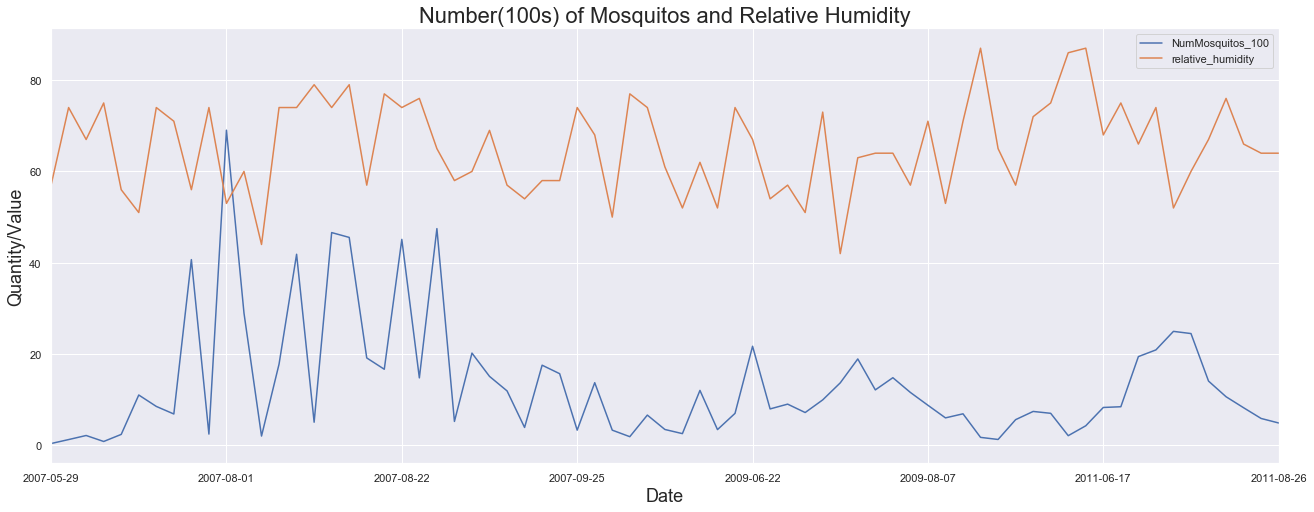

In [291]:
fig, ax = plt.subplots(figsize=(22,8))
df_timeshift_tr_b4spray.plot('Date','NumMosquitos_100',ax=ax)
df_timeshift_tr_b4spray.plot('Date','relative_humidity',ax=ax)
plt.title('Number(100s) of Mosquitos and Relative Humidity', fontsize=22)
plt.ylabel('Quantity/Value', fontsize=18)
plt.xlabel('Date', fontsize=18)

Text(0.5, 0, 'Date')

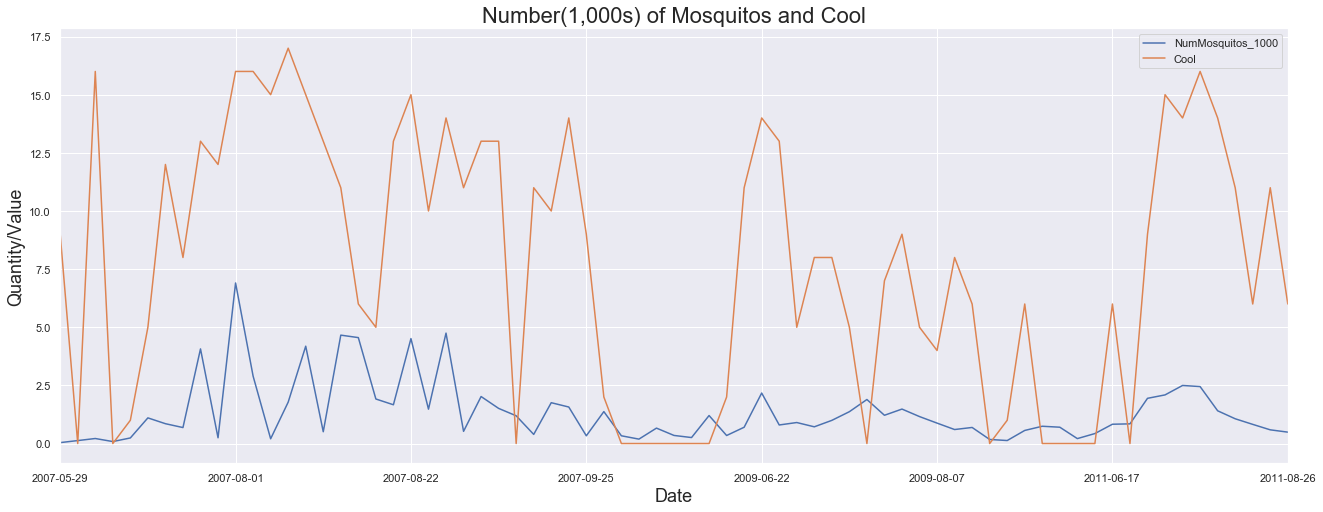

In [292]:
fig, ax = plt.subplots(figsize=(22,8))
df_timeshift_tr_b4spray.plot('Date','NumMosquitos_1000',ax=ax)
df_timeshift_tr_b4spray.plot('Date','Cool',ax=ax)
plt.title('Number(1,000s) of Mosquitos and Cool', fontsize=22)
plt.ylabel('Quantity/Value', fontsize=18)
plt.xlabel('Date', fontsize=18)

Text(0.5, 0, 'Date')

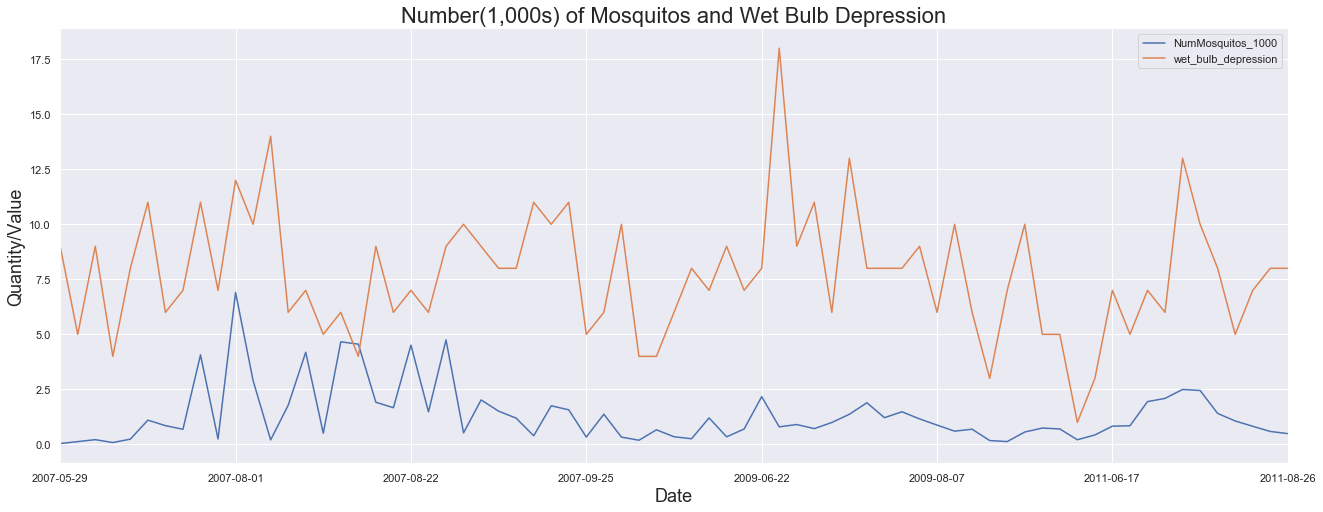

In [293]:
fig, ax = plt.subplots(figsize=(22,8))
df_timeshift_tr_b4spray.plot('Date','NumMosquitos_1000',ax=ax)
df_timeshift_tr_b4spray.plot('Date','wet_bulb_depression',ax=ax)
plt.title('Number(1,000s) of Mosquitos and Wet Bulb Depression', fontsize=22)
plt.ylabel('Quantity/Value', fontsize=18)
plt.xlabel('Date', fontsize=18)

Text(0.5, 0, 'Date')

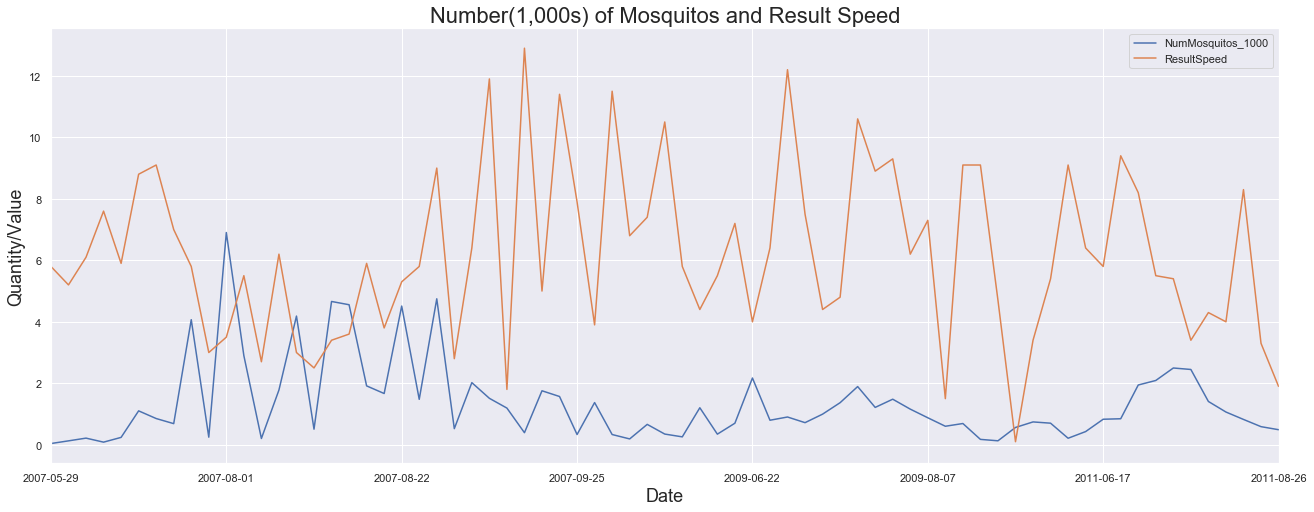

In [294]:
fig, ax = plt.subplots(figsize=(22,8))
df_timeshift_tr_b4spray.plot('Date','NumMosquitos_1000',ax=ax)
df_timeshift_tr_b4spray.plot('Date','ResultSpeed',ax=ax)
plt.title('Number(1,000s) of Mosquitos and Result Speed', fontsize=22)
plt.ylabel('Quantity/Value', fontsize=18)
plt.xlabel('Date', fontsize=18)

# TIME SERIES LAG TIME ANALYSIS

In [295]:
df_weather1=df_weather[df_weather['Station']==1]

In [296]:
# Created a column to calulate the approximate number of hours sunlight in a day
df_weather1['sunlight']=df_weather1['daytime'].str.slice(7, 9, 1)

C:\Users\XXX\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [297]:
df_weather1.columns

Index(['Date', 'Station', 'month', 'year', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'dew_point_depression', 'WetBulb', 'wet_bulb_depression',
       'relative_humidity', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'daytime',
       'PrecipTotal', 'StnPressure', 'ResultSpeed', 'ResultDir', 'MIFG',
       'VCFG', 'BCFG', 'RA', 'FG+', 'GR', 'VCTS', 'BR', 'FG', 'TS', 'FU',
       'TSRA', 'SQ', 'DZ', 'HZ', 'SN', 'sunlight'],
      dtype='object')

In [298]:
# Created a dataframe with weather conditions for time shift analysis
df_shift_tr1=df_weather1.loc[:,['Date',  'Tavg',  'DewPoint','Heat', 'Cool', 'sunlight','PrecipTotal', 
                                'ResultSpeed', 'ResultDir','wet_bulb_depression','relative_humidity']]
df_shift_tr1.head()

Date  Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
0 2007-05-01  67.0        51   0.0   2.0       14        0.000          1.7   
2 2007-05-02  51.0        42  14.0   0.0       14        0.000         13.0   
4 2007-05-03  56.0        40   9.0   0.0       14        0.000         11.7   
6 2007-05-04  58.0        41   7.0   0.0       14        0.005         10.4   
8 2007-05-05  60.0        38   5.0   0.0       14        0.005         11.7   

   ResultDir  wet_bulb_depression  relative_humidity  
0         27                 11.0                 56  
2          4                  4.0                 71  
4          7                  8.0                 55  
6          8                  8.0                 53  
8          7                 11.0                 44

In [299]:
# Changed the index to date to do a time shift analysis
df_shift_tr1=df_shift_tr1.set_index('Date',drop =True)
df_shift_tr1.head()

Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
Date                                                                        
2007-05-01  67.0        51   0.0   2.0       14        0.000          1.7   
2007-05-02  51.0        42  14.0   0.0       14        0.000         13.0   
2007-05-03  56.0        40   9.0   0.0       14        0.000         11.7   
2007-05-04  58.0        41   7.0   0.0       14        0.005         10.4   
2007-05-05  60.0        38   5.0   0.0       14        0.005         11.7   

            ResultDir  wet_bulb_depression  relative_humidity  
Date                                                           
2007-05-01         27                 11.0                 56  
2007-05-02          4                  4.0                 71  
2007-05-03          7                  8.0                 55  
2007-05-04          8                  8.0                 53  
2007-05-05          7                 11.0                 44

In [300]:
# Another dataframe is created without timeshift to compare against the time shifted weather data
df_timeshift_tr2=df_tr_full.loc[:,['Date','WnvPresent','NumMosquitos']]

In [301]:
df_timeshift_tr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 3 columns):
Date            10482 non-null datetime64[ns]
WnvPresent      10482 non-null float64
NumMosquitos    10482 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 245.8 KB


In [302]:
df_timeshift_tr2.head()

Date  WnvPresent  NumMosquitos
0 2007-05-29         0.0           1.0
1 2007-05-29         0.0           1.0
2 2007-05-29         0.0           1.0
3 2007-05-29         0.0           1.0
4 2007-05-29         0.0           4.0

In [303]:
# Since we have multiple rows for same date. We can groupby date for our timeshift analysis.
df_timeshift_tr2=df_timeshift_tr2.groupby('Date')
df_timeshift_tr2

In [304]:
# Then added the WNV on the same days individualy
df_timeshift_tr2=df_timeshift_tr2.sum()
df_timeshift_tr2.head()

WnvPresent  NumMosquitos
Date                                
2007-05-29         0.0          40.0
2007-06-05         0.0         127.0
2007-06-26         0.0         216.0
2007-06-29         0.0          39.0
2007-07-02         0.0         240.0

In [305]:
# Then merged the weather dataframe without a shift and WNV dataframe together
df_timeshift_tr1_noshift = pd.merge(df_shift_tr1, df_timeshift_tr2, on='Date', how='right')
df_timeshift_tr1_noshift.head()

Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
Date                                                                        
2007-05-29  74.0        58   0.0   9.0       14         0.00          5.8   
2007-06-05  56.0        48   9.0   0.0       15         0.42          5.2   
2007-06-26  81.0        69   0.0  16.0       15         0.16          6.1   
2007-06-29  63.0        55   2.0   0.0       15         0.00          7.6   
2007-07-02  66.0        50   0.0   1.0       15         0.00          5.9   

            ResultDir  wet_bulb_depression  relative_humidity  WnvPresent  \
Date                                                                        
2007-05-29         18                  9.0                 57         0.0   
2007-06-05          5                  5.0                 74         0.0   
2007-06-26         22                  9.0                 67         0.0   
2007-06-29          2                  4.0                 75         0.0   
2007-07-02         14                  8.0                 56         0.0   

            NumMosquitos  
Date                      
2007-05-29          40.0  
2007-06-05         127.0  
2007-06-26         216.0  
2007-06-29          39.0  
2007-07-02         240.0

In [306]:
#Since our train data doesn't have values for all dates. We will drop the null values at the NumMosquitos 
df_timeshift_tr1_noshift.dropna(inplace=True)

In [307]:
# Correlation of weather against WNV on the sameday
wt_wnv_sameday=df_timeshift_tr1_noshift.corr()['WnvPresent'].sort_values()
wt_mos_sameday=df_timeshift_tr1_noshift.corr()['NumMosquitos'].sort_values()

In [308]:
# Weather data shifted by 1 day
df_shift_tr1_shift1=df_shift_tr1.shift(1)
df_shift_tr1_shift1.head()

Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
Date                                                                        
2007-05-01   NaN       NaN   NaN   NaN      NaN          NaN          NaN   
2007-05-02  67.0      51.0   0.0   2.0       14        0.000          1.7   
2007-05-03  51.0      42.0  14.0   0.0       14        0.000         13.0   
2007-05-04  56.0      40.0   9.0   0.0       14        0.000         11.7   
2007-05-05  58.0      41.0   7.0   0.0       14        0.005         10.4   

            ResultDir  wet_bulb_depression  relative_humidity  
Date                                                           
2007-05-01        NaN                  NaN                NaN  
2007-05-02       27.0                 11.0               56.0  
2007-05-03        4.0                  4.0               71.0  
2007-05-04        7.0                  8.0               55.0  
2007-05-05        8.0                  8.0               53.0

In [309]:
# Merged the weather data shifted by one day along with WNV 
df_timeshift_tr_1day = pd.merge(df_shift_tr1_shift1, df_timeshift_tr2, on='Date', how='right')
df_timeshift_tr_1day.head()

Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
Date                                                                        
2007-05-29  65.0      47.0   0.0   0.0       14        0.005          4.8   
2007-06-05  65.0      58.0   0.0   0.0       15        0.390          7.8   
2007-06-26  77.0      66.0   0.0  12.0       15        0.000          3.9   
2007-06-29  66.0      55.0   0.0   1.0       15        0.000         11.9   
2007-07-02  65.0      52.0   0.0   0.0       15        0.000          8.6   

            ResultDir  wet_bulb_depression  relative_humidity  WnvPresent  \
Date                                                                        
2007-05-29       10.0                  9.0               52.0         0.0   
2007-06-05       31.0                  5.0               78.0         0.0   
2007-06-26       14.0                  7.0               69.0         0.0   
2007-06-29        3.0                  6.0               68.0         0.0   
2007-07-02        4.0                  7.0               63.0         0.0   

            NumMosquitos  
Date                      
2007-05-29          40.0  
2007-06-05         127.0  
2007-06-26         216.0  
2007-06-29          39.0  
2007-07-02         240.0

In [310]:
# Null values are dropped
df_timeshift_tr_1day.dropna(inplace=True)
# Checking the correlation between weather data shifted by 1 day against WNV
wt_wnv_after_1d=df_timeshift_tr_1day.corr()['WnvPresent'].sort_values()
wt_mos_after_1d=df_timeshift_tr_1day.corr()['NumMosquitos'].sort_values()

In [311]:
# Weather data shifted by 2 days
df_shift_tr1_shift2=df_shift_tr1.shift(2)
# Merged the weather data shifted by 2 days along with WNV 
df_timeshift_tr_2day = pd.merge(df_shift_tr1_shift2, df_timeshift_tr2, on='Date', how='right')
# Dropped null values
df_timeshift_tr_2day.dropna(inplace=True)
df_timeshift_tr_2day.head()

Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
Date                                                                        
2007-05-29  66.0      47.0   0.0   1.0       14         0.04          8.9   
2007-06-05  70.0      60.0   0.0   5.0       15         0.01          5.2   
2007-06-26  70.0      62.0   0.0   5.0       15         0.00          7.0   
2007-06-29  81.0      70.0   0.0  16.0       15         0.15          7.5   
2007-07-02  67.0      46.0   0.0   2.0       15         0.00          4.9   

            ResultDir  wet_bulb_depression  relative_humidity  WnvPresent  \
Date                                                                        
2007-05-29       26.0                 10.0               50.0         0.0   
2007-06-05       25.0                  7.0               71.0         0.0   
2007-06-26        9.0                  5.0               76.0         0.0   
2007-06-29       24.0                  9.0               69.0         0.0   
2007-07-02        3.0                 11.0               47.0         0.0   

            NumMosquitos  
Date                      
2007-05-29          40.0  
2007-06-05         127.0  
2007-06-26         216.0  
2007-06-29          39.0  
2007-07-02         240.0

In [312]:
# Checking the correlation between weather data shifted by 2 days against WNV
wt_wnv_after_2d=df_timeshift_tr_2day.corr()['WnvPresent'].sort_values()
wt_mos_after_2d=df_timeshift_tr_2day.corr()['NumMosquitos'].sort_values()

Repeated the same steps for 3, 7 and 10 days

In [313]:
df_shift_tr1_shift3=df_shift_tr1.shift(3)
df_timeshift_tr_3day = pd.merge(df_shift_tr1_shift3, df_timeshift_tr2, on='Date', how='right')
df_timeshift_tr_3day.dropna(inplace=True)
df_timeshift_tr_3day.head()

Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
Date                                                                        
2007-05-29  57.0      55.0   8.0   0.0       14         1.01          2.8   
2007-06-05  73.0      63.0   0.0   8.0       15         0.04          6.5   
2007-06-26  65.0      58.0   0.0   0.0       15         0.05          7.6   
2007-06-29  81.0      69.0   0.0  16.0       15         0.16          6.1   
2007-07-02  63.0      55.0   2.0   0.0       15         0.00          7.6   

            ResultDir  wet_bulb_depression  relative_humidity  WnvPresent  \
Date                                                                        
2007-05-29       17.0                  1.0               93.0         0.0   
2007-06-05       22.0                  6.0               71.0         0.0   
2007-06-26       12.0                  4.0               78.0         0.0   
2007-06-29       22.0                  9.0               67.0         0.0   
2007-07-02        2.0                  4.0               75.0         0.0   

            NumMosquitos  
Date                      
2007-05-29          40.0  
2007-06-05         127.0  
2007-06-26         216.0  
2007-06-29          39.0  
2007-07-02         240.0

In [314]:
wt_wnv_after_3d=df_timeshift_tr_3day.corr()['WnvPresent'].sort_values()
wt_mos_after_3d=df_timeshift_tr_3day.corr()['NumMosquitos'].sort_values()

In [315]:
df_shift_tr1_shift7=df_shift_tr1.shift(7)
df_timeshift_tr_7day = pd.merge(df_shift_tr1_shift7, df_timeshift_tr2, on='Date', how='right')
df_timeshift_tr_7day.dropna(inplace=True)
df_timeshift_tr_7day.head()

Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
Date                                                                        
2007-05-29  71.0      46.0   0.0   6.0       14        0.000         10.0   
2007-06-05  74.0      58.0   0.0   9.0       14        0.000          5.8   
2007-06-26  73.0      55.0   0.0   8.0       15        0.580         10.7   
2007-06-29  69.0      50.0   0.0   4.0       15        0.005          7.8   
2007-07-02  77.0      66.0   0.0  12.0       15        0.000          3.9   

            ResultDir  wet_bulb_depression  relative_humidity  WnvPresent  \
Date                                                                        
2007-05-29       18.0                 13.0               41.0         0.0   
2007-06-05       18.0                  9.0               57.0         0.0   
2007-06-26       28.0                 10.0               53.0         0.0   
2007-06-29        6.0                 11.0               51.0         0.0   
2007-07-02       14.0                  7.0               69.0         0.0   

            NumMosquitos  
Date                      
2007-05-29          40.0  
2007-06-05         127.0  
2007-06-26         216.0  
2007-06-29          39.0  
2007-07-02         240.0

In [316]:
wt_wnv_after_7d=df_timeshift_tr_7day.corr()['WnvPresent'].sort_values()
wt_mos_after_7d=df_timeshift_tr_7day.corr()['NumMosquitos'].sort_values()

In [317]:
df_shift_tr1_shift10=df_shift_tr1.shift(10)
df_timeshift_tr_10day = pd.merge(df_shift_tr1_shift10, df_timeshift_tr2, on='Date', how='right')
df_timeshift_tr_10day.dropna(inplace=True)
df_timeshift_tr_10day.head()

Tavg  DewPoint  Heat  Cool sunlight  PrecipTotal  ResultSpeed  \
Date                                                                        
2007-05-29  68.0      39.0   0.0   3.0       14        0.000         11.1   
2007-06-05  57.0      55.0   8.0   0.0       14        1.010          2.8   
2007-06-26  80.0      60.0   0.0  15.0       15        0.005          4.8   
2007-06-29  73.0      55.0   0.0   8.0       15        0.580         10.7   
2007-07-02  69.0      50.0   0.0   4.0       15        0.005          7.8   

            ResultDir  wet_bulb_depression  relative_humidity  WnvPresent  \
Date                                                                        
2007-05-29       24.0                 15.0               35.0         0.0   
2007-06-05       17.0                  1.0               93.0         0.0   
2007-06-26       28.0                 13.0               51.0         0.0   
2007-06-29       28.0                 10.0               53.0         0.0   
2007-07-02        6.0                 11.0               51.0         0.0   

            NumMosquitos  
Date                      
2007-05-29          40.0  
2007-06-05         127.0  
2007-06-26         216.0  
2007-06-29          39.0  
2007-07-02         240.0

In [318]:
wt_wnv_after_10d=df_timeshift_tr_10day.corr()['WnvPresent'].sort_values()
wt_mos_after_10d=df_timeshift_tr_10day.corr()['NumMosquitos'].sort_values()

In [319]:
# Concatinated the correlation of number of mosquitos against the shift in weather data by 0,1,2,3,7 and 10 days
wt_mos_time=pd.concat([wt_mos_sameday,wt_mos_after_1d, wt_mos_after_2d,wt_mos_after_3d, wt_mos_after_7d, wt_mos_after_10d,
                      ], axis=1,sort=True)

In [320]:
# Concatinated the correlation of WNV against the shift in weather data by 0,1,2,3,7 and 10 days
wt_wnv_time=pd.concat([wt_wnv_sameday,wt_wnv_after_1d, wt_wnv_after_2d,wt_wnv_after_3d, wt_wnv_after_7d, wt_wnv_after_10d], axis=1,sort=True)

In [321]:
wt_mos_time

NumMosquitos  NumMosquitos  NumMosquitos  NumMosquitos  \
Cool                     0.403430      0.390186      0.301969      0.247934   
DewPoint                 0.333852      0.325216      0.268698      0.307372   
Heat                    -0.280632     -0.241858     -0.249035     -0.292508   
NumMosquitos             1.000000      1.000000      1.000000      1.000000   
PrecipTotal             -0.080123     -0.002633      0.058900      0.163517   
ResultDir               -0.025972     -0.012185     -0.043216      0.035362   
ResultSpeed             -0.123427     -0.118667     -0.101968     -0.111858   
Tavg                     0.404178      0.394610      0.326388      0.297034   
WnvPresent               0.568844      0.568844      0.568844      0.568844   
relative_humidity       -0.081867     -0.040890     -0.041697      0.089093   
wet_bulb_depression      0.216200      0.179953      0.089592     -0.017385   

                     NumMosquitos  NumMosquitos  
Cool                     0.342287      0.158212  
DewPoint                 0.278378      0.232356  
Heat                    -0.144194     -0.170919  
NumMosquitos             1.000000      1.000000  
PrecipTotal             -0.039204     -0.024615  
ResultDir               -0.017456     -0.138864  
ResultSpeed             -0.249669     -0.207032  
Tavg                     0.326353      0.186480  
WnvPresent               0.568844      0.568844  
relative_humidity        0.023177      0.104861  
wet_bulb_depression      0.072313     -0.051458

In [322]:
wt_wnv_time

WnvPresent  WnvPresent  WnvPresent  WnvPresent  \
Cool                   0.237835    0.269903    0.220876    0.058498   
DewPoint               0.289835    0.344146    0.259084    0.206776   
Heat                  -0.193038   -0.156779   -0.163134   -0.179087   
NumMosquitos           0.568844    0.568844    0.568844    0.568844   
PrecipTotal           -0.056843    0.151008    0.008947    0.001658   
ResultDir              0.024207    0.040792    0.005138    0.030598   
ResultSpeed           -0.197701   -0.146341    0.062184   -0.024793   
Tavg                   0.249920    0.269202    0.232381    0.109431   
WnvPresent             1.000000    1.000000    1.000000    1.000000   
relative_humidity      0.112798    0.223509    0.101171    0.201090   
wet_bulb_depression   -0.017423   -0.107242   -0.037003   -0.163661   

                     WnvPresent  WnvPresent  
Cool                   0.233946    0.263569  
DewPoint               0.273264    0.381941  
Heat                  -0.132509   -0.188456  
NumMosquitos           0.568844    0.568844  
PrecipTotal           -0.045041    0.033135  
ResultDir              0.057443    0.017865  
ResultSpeed           -0.264704   -0.208484  
Tavg                   0.234070    0.277499  
WnvPresent             1.000000    1.000000  
relative_humidity      0.140836    0.234576  
wet_bulb_depression   -0.066291   -0.148021

In [323]:
# Changed the column name
wt_wnv_time.columns = ['WNVsameday', 'WNVafter1d', 'WNVafter2d', 'WNVafter3d', 'WNVafter7d', 'WNVafter10d']
wt_mos_time.columns = ['MSQsameday', 'MSQafter1d', 'MSQafter2d', 'MSQafter3d', 'MSQafter7d', 'MSQafter10d']

In [324]:
# Created a row with number of days the weather data is shifted
wt_wnv_time.loc['Number of the days weather shifted'] = [0,1,2,3,7,10]
wt_wnv_time=wt_wnv_time.transpose()
wt_wnv_time

Cool  DewPoint      Heat  NumMosquitos  PrecipTotal  \
WNVsameday   0.237835  0.289835 -0.193038      0.568844    -0.056843   
WNVafter1d   0.269903  0.344146 -0.156779      0.568844     0.151008   
WNVafter2d   0.220876  0.259084 -0.163134      0.568844     0.008947   
WNVafter3d   0.058498  0.206776 -0.179087      0.568844     0.001658   
WNVafter7d   0.233946  0.273264 -0.132509      0.568844    -0.045041   
WNVafter10d  0.263569  0.381941 -0.188456      0.568844     0.033135   

             ResultDir  ResultSpeed      Tavg  WnvPresent  relative_humidity  \
WNVsameday    0.024207    -0.197701  0.249920         1.0           0.112798   
WNVafter1d    0.040792    -0.146341  0.269202         1.0           0.223509   
WNVafter2d    0.005138     0.062184  0.232381         1.0           0.101171   
WNVafter3d    0.030598    -0.024793  0.109431         1.0           0.201090   
WNVafter7d    0.057443    -0.264704  0.234070         1.0           0.140836   
WNVafter10d   0.017865    -0.208484  0.277499         1.0           0.234576   

             wet_bulb_depression  Number of the days weather shifted  
WNVsameday             -0.017423                                 0.0  
WNVafter1d             -0.107242                                 1.0  
WNVafter2d             -0.037003                                 2.0  
WNVafter3d             -0.163661                                 3.0  
WNVafter7d             -0.066291                                 7.0  
WNVafter10d            -0.148021                                10.0

In [325]:
wt_mos_time.loc['Number of the days weather shifted'] = [0,1,2,3,7,10]
wt_mos_time=wt_mos_time.transpose()
wt_mos_time

Cool  DewPoint      Heat  NumMosquitos  PrecipTotal  \
MSQsameday   0.403430  0.333852 -0.280632           1.0    -0.080123   
MSQafter1d   0.390186  0.325216 -0.241858           1.0    -0.002633   
MSQafter2d   0.301969  0.268698 -0.249035           1.0     0.058900   
MSQafter3d   0.247934  0.307372 -0.292508           1.0     0.163517   
MSQafter7d   0.342287  0.278378 -0.144194           1.0    -0.039204   
MSQafter10d  0.158212  0.232356 -0.170919           1.0    -0.024615   

             ResultDir  ResultSpeed      Tavg  WnvPresent  relative_humidity  \
MSQsameday   -0.025972    -0.123427  0.404178    0.568844          -0.081867   
MSQafter1d   -0.012185    -0.118667  0.394610    0.568844          -0.040890   
MSQafter2d   -0.043216    -0.101968  0.326388    0.568844          -0.041697   
MSQafter3d    0.035362    -0.111858  0.297034    0.568844           0.089093   
MSQafter7d   -0.017456    -0.249669  0.326353    0.568844           0.023177   
MSQafter10d  -0.138864    -0.207032  0.186480    0.568844           0.104861   

             wet_bulb_depression  Number of the days weather shifted  
MSQsameday              0.216200                                 0.0  
MSQafter1d              0.179953                                 1.0  
MSQafter2d              0.089592                                 2.0  
MSQafter3d             -0.017385                                 3.0  
MSQafter7d              0.072313                                 7.0  
MSQafter10d            -0.051458                                10.0

In [326]:
# Droped the column as we are comparing against carrelation of weather datas against WNV
wt_wnv_time.drop(columns=['WnvPresent','NumMosquitos'])

Cool  DewPoint      Heat  PrecipTotal  ResultDir  \
WNVsameday   0.237835  0.289835 -0.193038    -0.056843   0.024207   
WNVafter1d   0.269903  0.344146 -0.156779     0.151008   0.040792   
WNVafter2d   0.220876  0.259084 -0.163134     0.008947   0.005138   
WNVafter3d   0.058498  0.206776 -0.179087     0.001658   0.030598   
WNVafter7d   0.233946  0.273264 -0.132509    -0.045041   0.057443   
WNVafter10d  0.263569  0.381941 -0.188456     0.033135   0.017865   

             ResultSpeed      Tavg  relative_humidity  wet_bulb_depression  \
WNVsameday     -0.197701  0.249920           0.112798            -0.017423   
WNVafter1d     -0.146341  0.269202           0.223509            -0.107242   
WNVafter2d      0.062184  0.232381           0.101171            -0.037003   
WNVafter3d     -0.024793  0.109431           0.201090            -0.163661   
WNVafter7d     -0.264704  0.234070           0.140836            -0.066291   
WNVafter10d    -0.208484  0.277499           0.234576            -0.148021   

             Number of the days weather shifted  
WNVsameday                                  0.0  
WNVafter1d                                  1.0  
WNVafter2d                                  2.0  
WNVafter3d                                  3.0  
WNVafter7d                                  7.0  
WNVafter10d                                10.0

In [327]:
wt_mos_time.drop(columns=['WnvPresent','NumMosquitos'])

Cool  DewPoint      Heat  PrecipTotal  ResultDir  \
MSQsameday   0.403430  0.333852 -0.280632    -0.080123  -0.025972   
MSQafter1d   0.390186  0.325216 -0.241858    -0.002633  -0.012185   
MSQafter2d   0.301969  0.268698 -0.249035     0.058900  -0.043216   
MSQafter3d   0.247934  0.307372 -0.292508     0.163517   0.035362   
MSQafter7d   0.342287  0.278378 -0.144194    -0.039204  -0.017456   
MSQafter10d  0.158212  0.232356 -0.170919    -0.024615  -0.138864   

             ResultSpeed      Tavg  relative_humidity  wet_bulb_depression  \
MSQsameday     -0.123427  0.404178          -0.081867             0.216200   
MSQafter1d     -0.118667  0.394610          -0.040890             0.179953   
MSQafter2d     -0.101968  0.326388          -0.041697             0.089592   
MSQafter3d     -0.111858  0.297034           0.089093            -0.017385   
MSQafter7d     -0.249669  0.326353           0.023177             0.072313   
MSQafter10d    -0.207032  0.186480           0.104861            -0.051458   

             Number of the days weather shifted  
MSQsameday                                  0.0  
MSQafter1d                                  1.0  
MSQafter2d                                  2.0  
MSQafter3d                                  3.0  
MSQafter7d                                  7.0  
MSQafter10d                                10.0

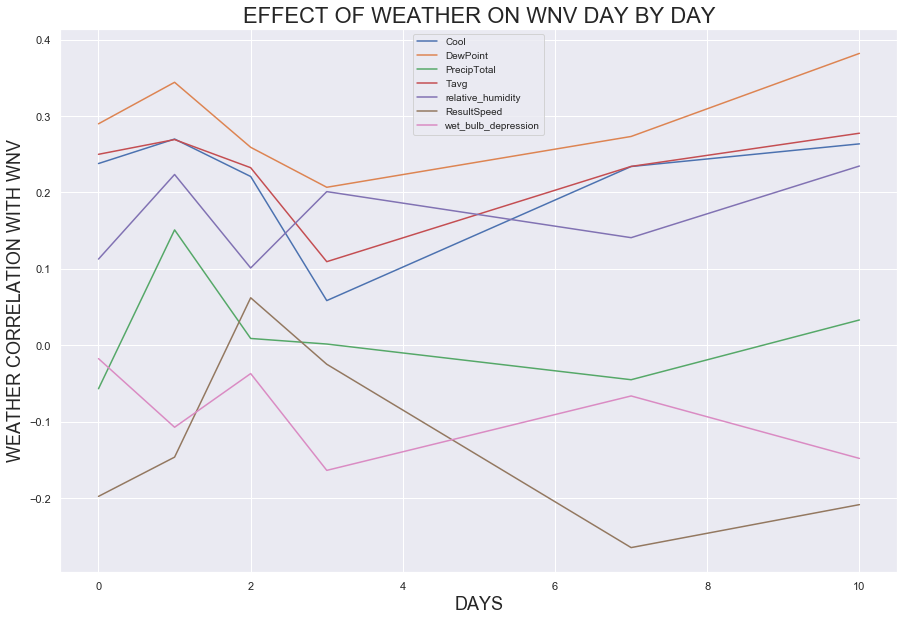

In [328]:
# Plot to check effect of weather on WNV
plt.figure(figsize = (15,10))
plt.plot(wt_wnv_time['Number of the days weather shifted'],wt_wnv_time['Cool'],label='Cool')
plt.plot(wt_wnv_time['Number of the days weather shifted'],wt_wnv_time['DewPoint'],label='DewPoint')
plt.plot(wt_wnv_time['Number of the days weather shifted'],wt_wnv_time['PrecipTotal'],label='PrecipTotal')
plt.plot(wt_wnv_time['Number of the days weather shifted'],wt_wnv_time['Tavg'],label='Tavg')
plt.plot(wt_wnv_time['Number of the days weather shifted'],wt_wnv_time['relative_humidity'],label='relative_humidity')
plt.plot(wt_wnv_time['Number of the days weather shifted'],wt_wnv_time['ResultSpeed'],label='ResultSpeed')
plt.plot(wt_wnv_time['Number of the days weather shifted'],wt_wnv_time['wet_bulb_depression'],label='wet_bulb_depression')
plt.title('EFFECT OF WEATHER ON WNV DAY BY DAY', fontsize=22)
plt.ylabel('WEATHER CORRELATION WITH WNV', fontsize=18)
plt.xlabel('DAYS', fontsize=18)

# Create legend.
plt.legend(fontsize=10);
plt.savefig('../EFFECT OF WEATHER ON WNV DAY BY DAY')

INTERPRETATION OF EFFECT OF WEATHER ON WNV DAY BY DAY:
1. On the 1st day, the correlation between the weather condition and WNV is higher compared to same        day and the second day except Result speed.
2. Result speed shows effect on the same day and in the 1st and 2nd day the WNV become higher as there maybe a change in wind direction or reduced speed on the days.
3. On the 7th day, in general there is no effect of weather on WNV.
4. On the 10th day, maybe the young musquitos developed after hatching, so again there is a raise in        correlation.

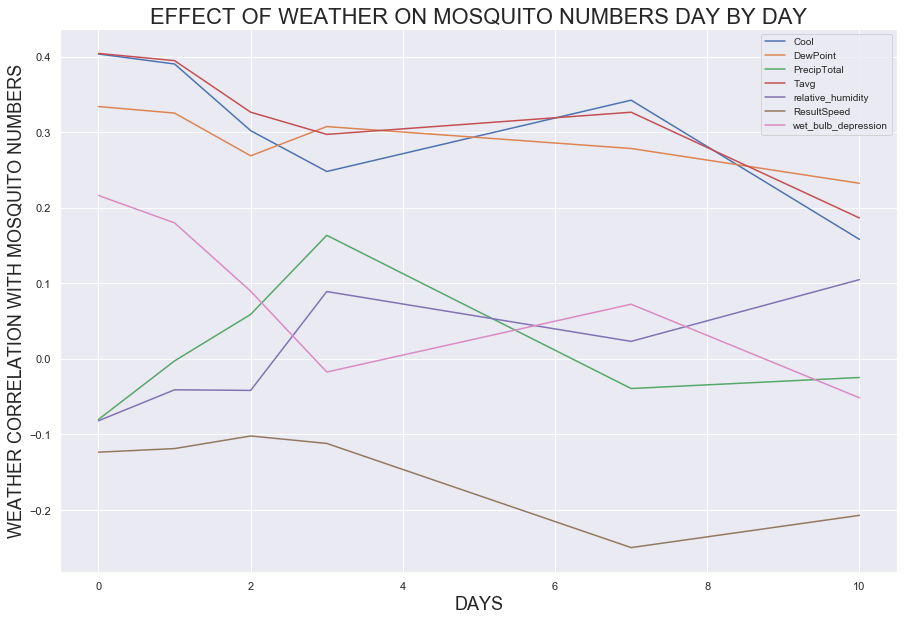

In [329]:
# Plot to check effect of weather on mosquito
plt.figure(figsize = (15,10))
plt.plot(wt_mos_time['Number of the days weather shifted'],wt_mos_time['Cool'],label='Cool')
plt.plot(wt_mos_time['Number of the days weather shifted'],wt_mos_time['DewPoint'],label='DewPoint')
plt.plot(wt_mos_time['Number of the days weather shifted'],wt_mos_time['PrecipTotal'],label='PrecipTotal')
plt.plot(wt_mos_time['Number of the days weather shifted'],wt_mos_time['Tavg'],label='Tavg')
plt.plot(wt_mos_time['Number of the days weather shifted'],wt_mos_time['relative_humidity'],label='relative_humidity')
plt.plot(wt_mos_time['Number of the days weather shifted'],wt_mos_time['ResultSpeed'],label='ResultSpeed')
plt.plot(wt_mos_time['Number of the days weather shifted'],wt_mos_time['wet_bulb_depression'],label='wet_bulb_depression')
plt.title('EFFECT OF WEATHER ON MOSQUITO NUMBERS DAY BY DAY', fontsize=22)
plt.ylabel('WEATHER CORRELATION WITH MOSQUITO NUMBERS', fontsize=18)
plt.xlabel('DAYS', fontsize=18)

# Create legend.
plt.legend(fontsize=10);
plt.savefig('../EFFECT OF WEATHER ON MOSQUITO NUMBERS DAY BY DAY')

INTERPRETATION OF EFFECT OF WEATHER ON MOSQUITOES DAY BY DAY:
1. Mosquito numbers goes high 0 to 3 days after rain or if the day is humid. 
2. If wetbulb depression is higher than the effect on mosquito is almost 0 on the third day. As it is the opposite of humidity.
3. Wind speed has negative correlation with number of mosquito. But after the wind subside the number of mosquito raise from 2nd to 7th day.
4. Cool and Tavg are quiet correlated, so they show same effect on mosquito. Mosquitos reduces with raise in temperature.
5. Dewpoint correlation with number of mosquito is some what constant except on 2nd and 7th day.
